



<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project-2 | Part-1 : Housing Values in Suburbs of Boston


**Wejdan, Yazeed and Amal.**

---

# 1. Load Libraries and Data

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams


np.set_printoptions(precision=4)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set(font_scale=1.5)

In [2]:
# Load the Boston housing dataset
train_data = pd.read_csv("train.csv")
test_data  = pd.read_csv("test.csv")

In [3]:
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
train_data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

# 2. EDA and visualization on the training data

In [5]:
# quike look to get various summary statistics in numeric data.
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [6]:
# quike look to get various summary statistics in categorical data.
train_data.describe(include=['O'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

In [7]:
# grab numeric columns.
numeric_features = train_data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
# grab object columns.
categorical_features = train_data.select_dtypes(include=[np.object])

numeric_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

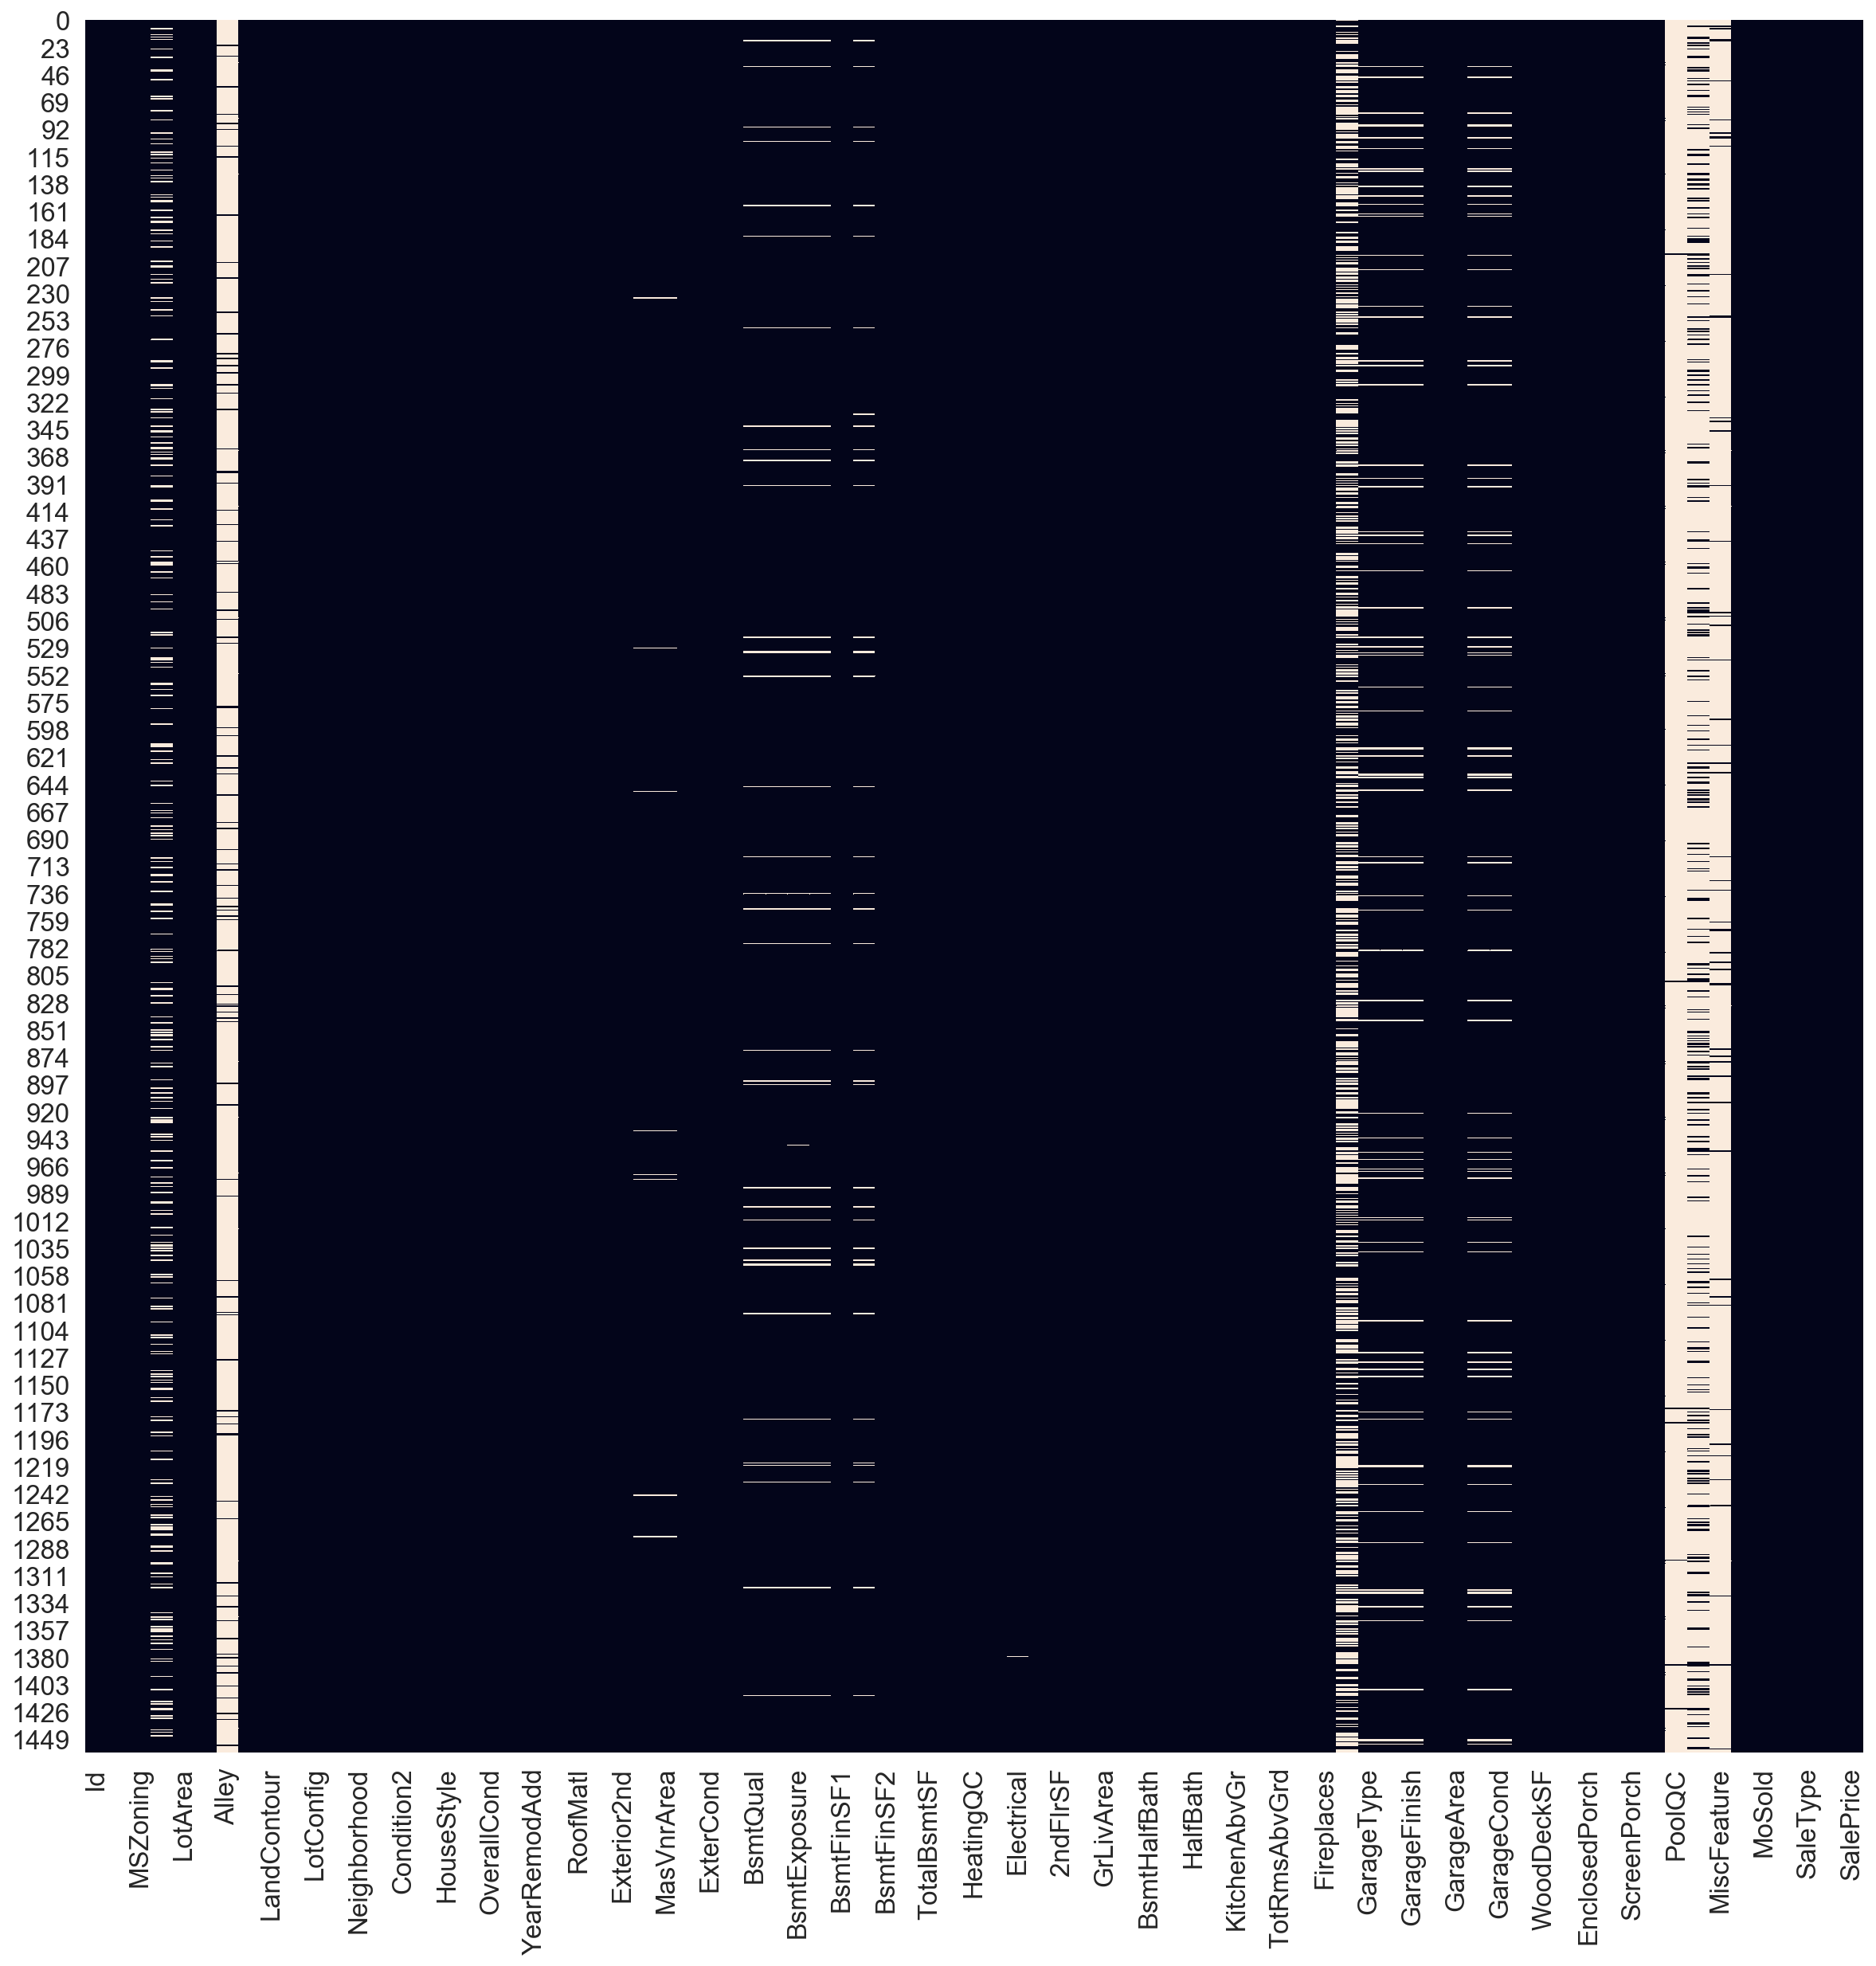

In [9]:
# shows missing data per column
plt.figure(figsize=(20,20))
sns.heatmap(train_data.isnull(),cbar=False)


**Initial Visualization**

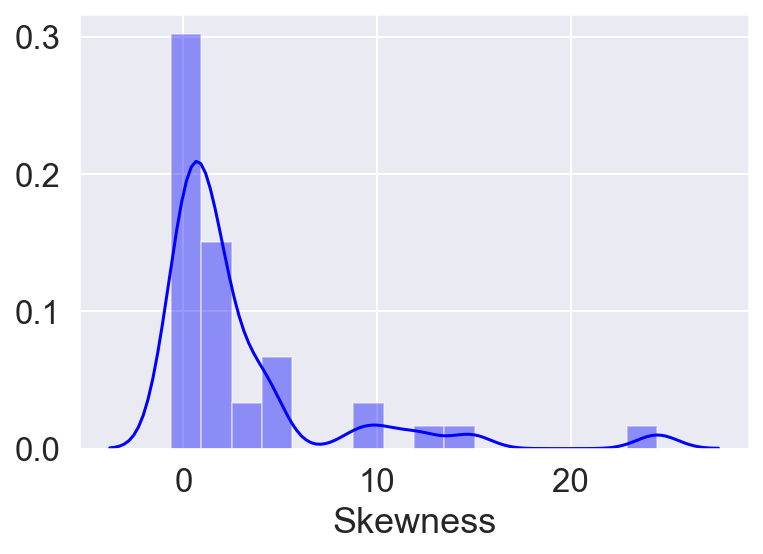

In [10]:
#the skewness of train data is rghite skewnsess
sns.distplot(train_data.skew(),color='blue',axlabel ='Skewness')

Text(0.5, 1.0, 'Sale price by utilites')

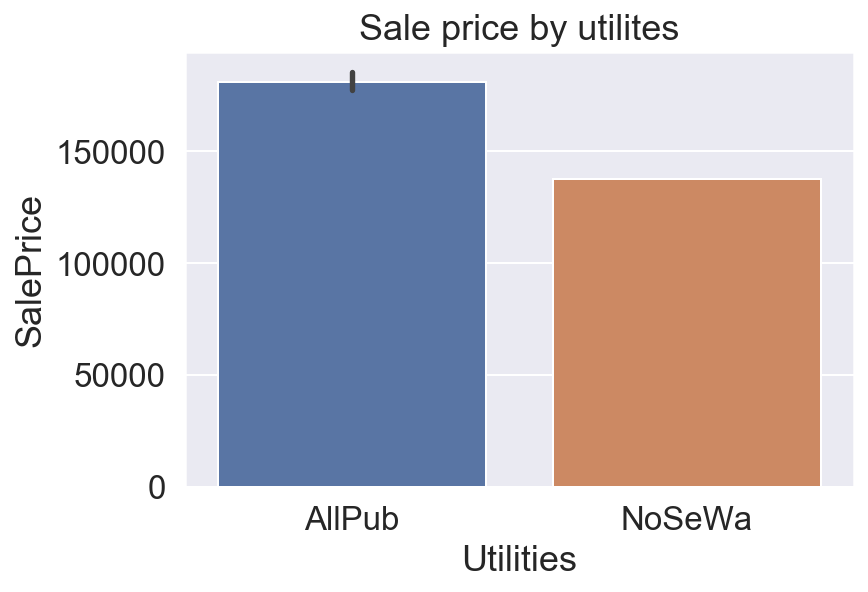

In [11]:
sns.barplot(y='SalePrice',x='Utilities',data=train_data)
plt.title('Sale price by utilites')

Text(0.5, 1.0, 'Sale Price by Neighborhood')

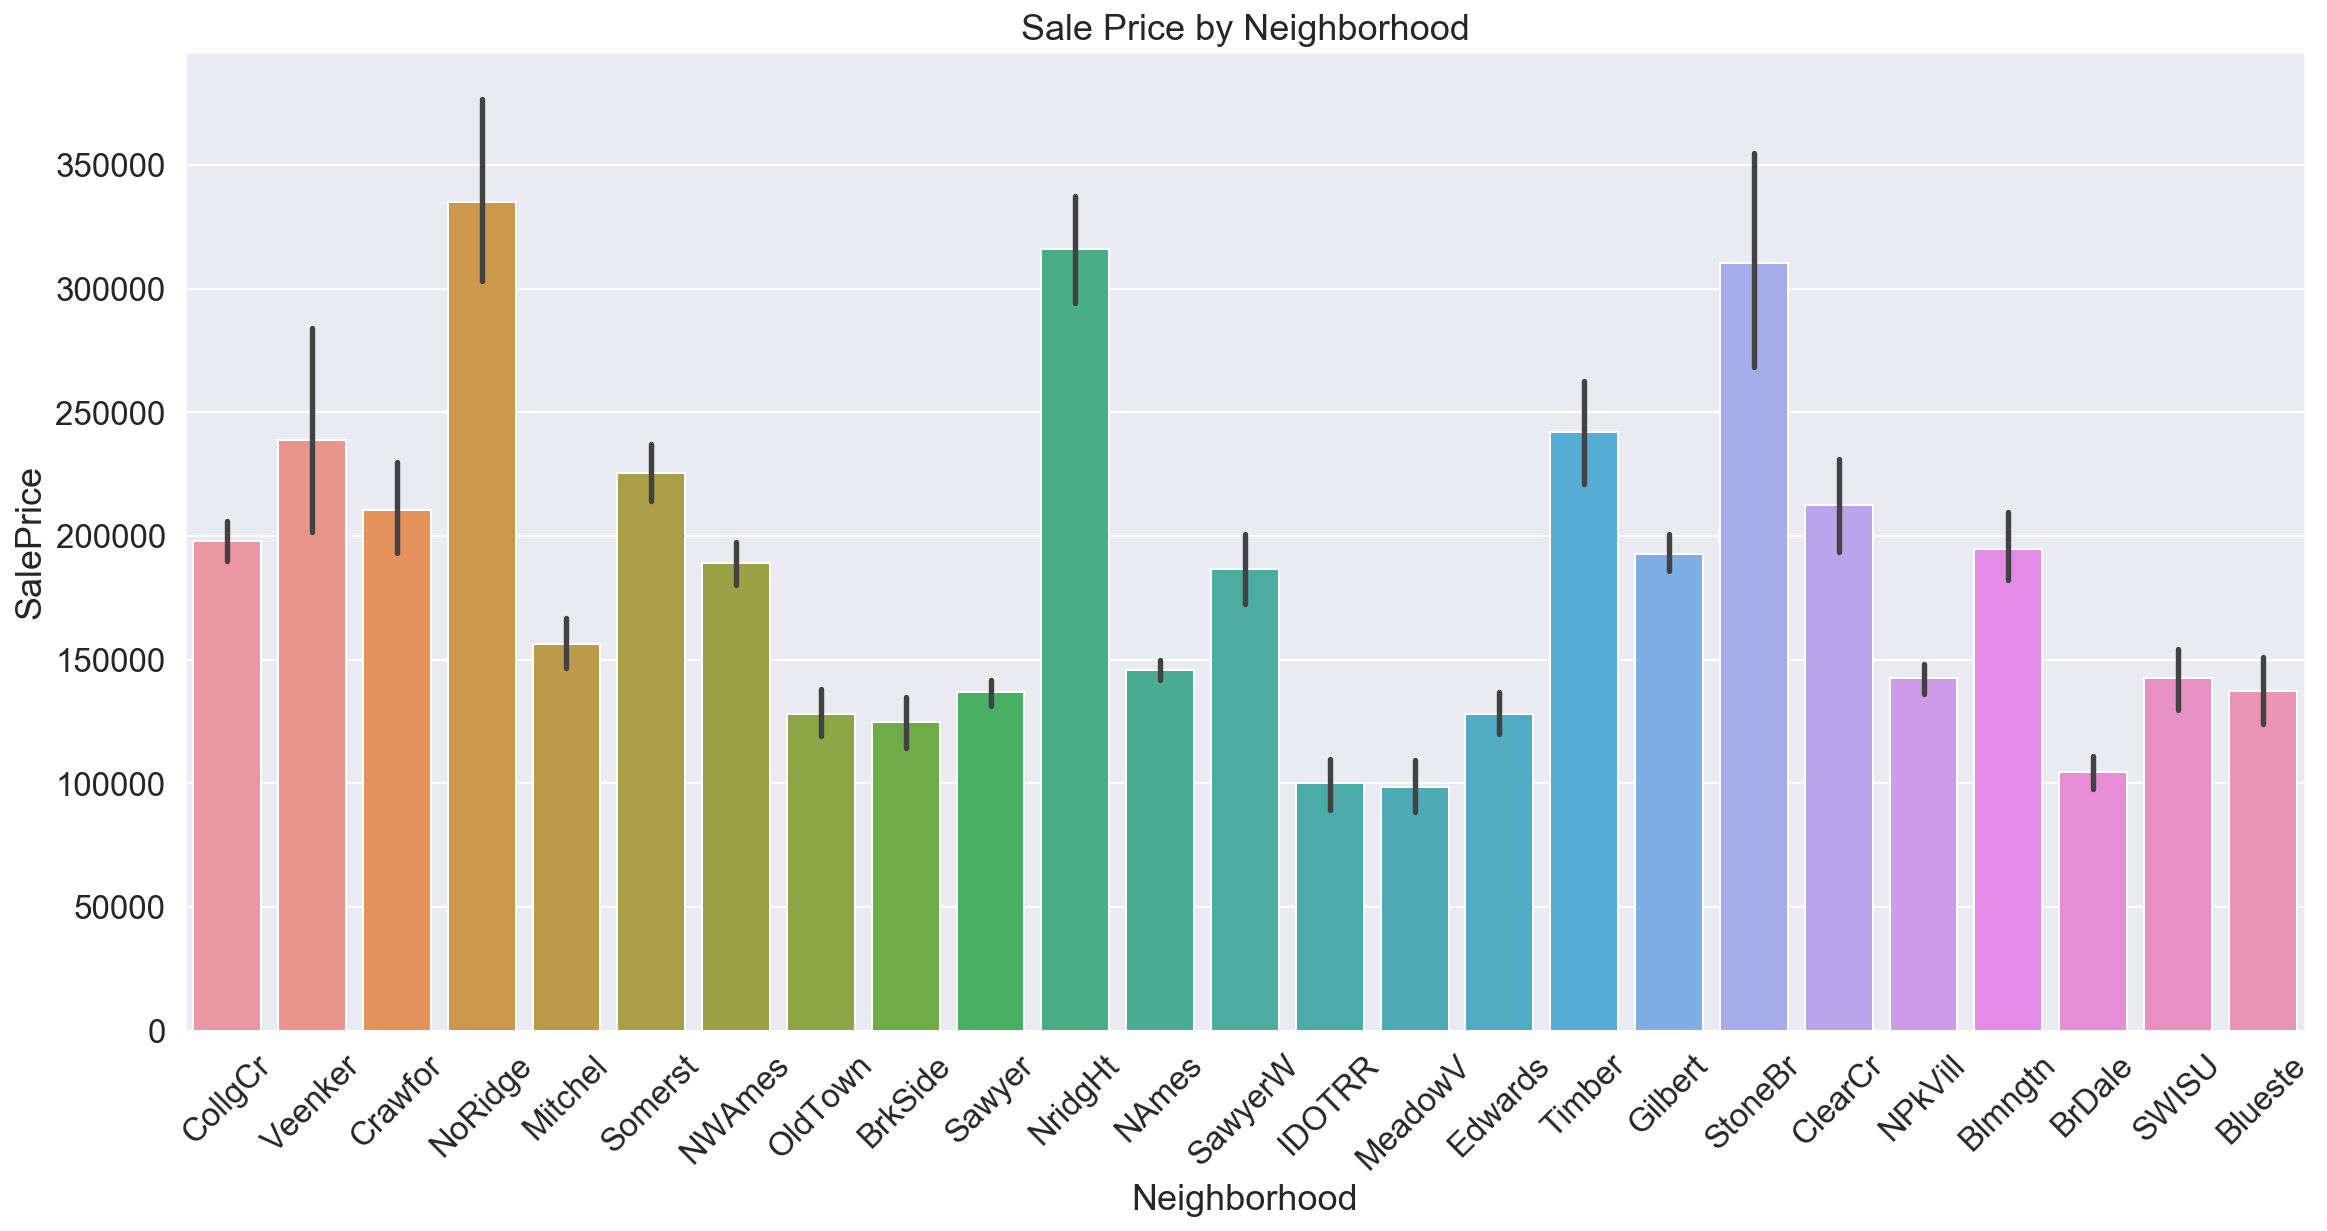

In [12]:
plt.figure(figsize=(19,9))
sns.barplot(y='SalePrice',x='Neighborhood',data=train_data)
xt = plt.xticks(rotation=45)
plt.title('Sale Price by Neighborhood')

Text(0.5, 1.0, 'Number of Sales per Neighborhood')

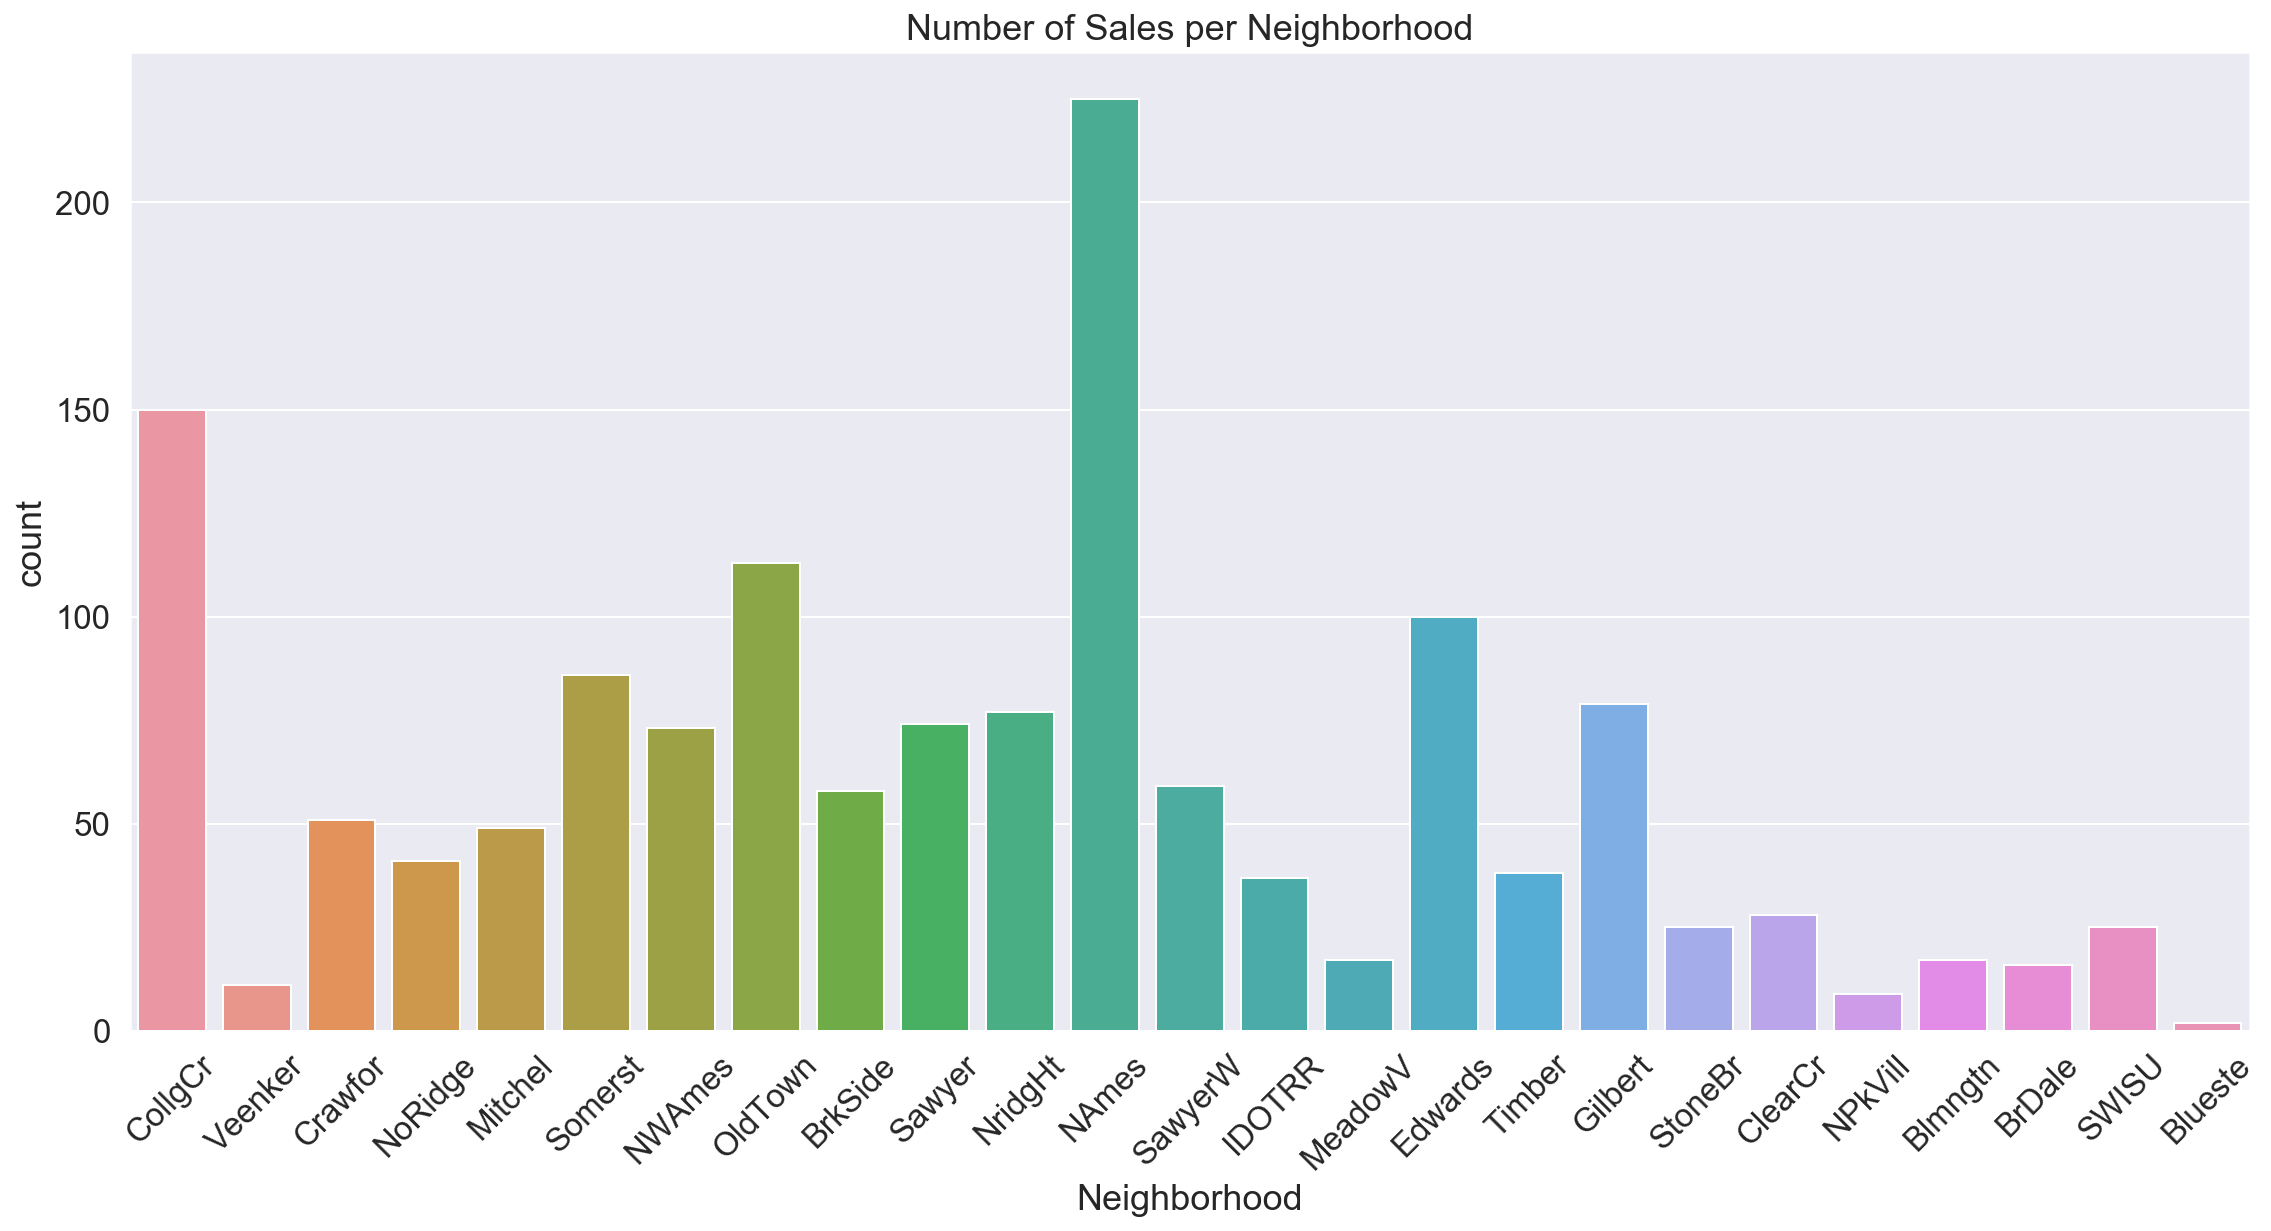

In [13]:
plt.figure(figsize = (19, 9))
sns.countplot(x = 'Neighborhood', data = train_data)
xt = plt.xticks(rotation=45)
plt.title('Number of Sales per Neighborhood')

In [14]:
plt.figure(figsize=(19,9))
sns.barplot(y='SalePrice',x='SaleType',data=train_data)
plt.title('Sale Price by Sale Type')

Text(0.5, 1.0, 'Sale Price by Sale Type')

In [15]:
plt.figure(figsize=(19,9))
sns.barplot(y='SalePrice',x='SaleCondition',data=train_data)
plt.title('Sale Price by Sale Condition')

Text(0.5, 1.0, 'Sale Price by Sale Condition')

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


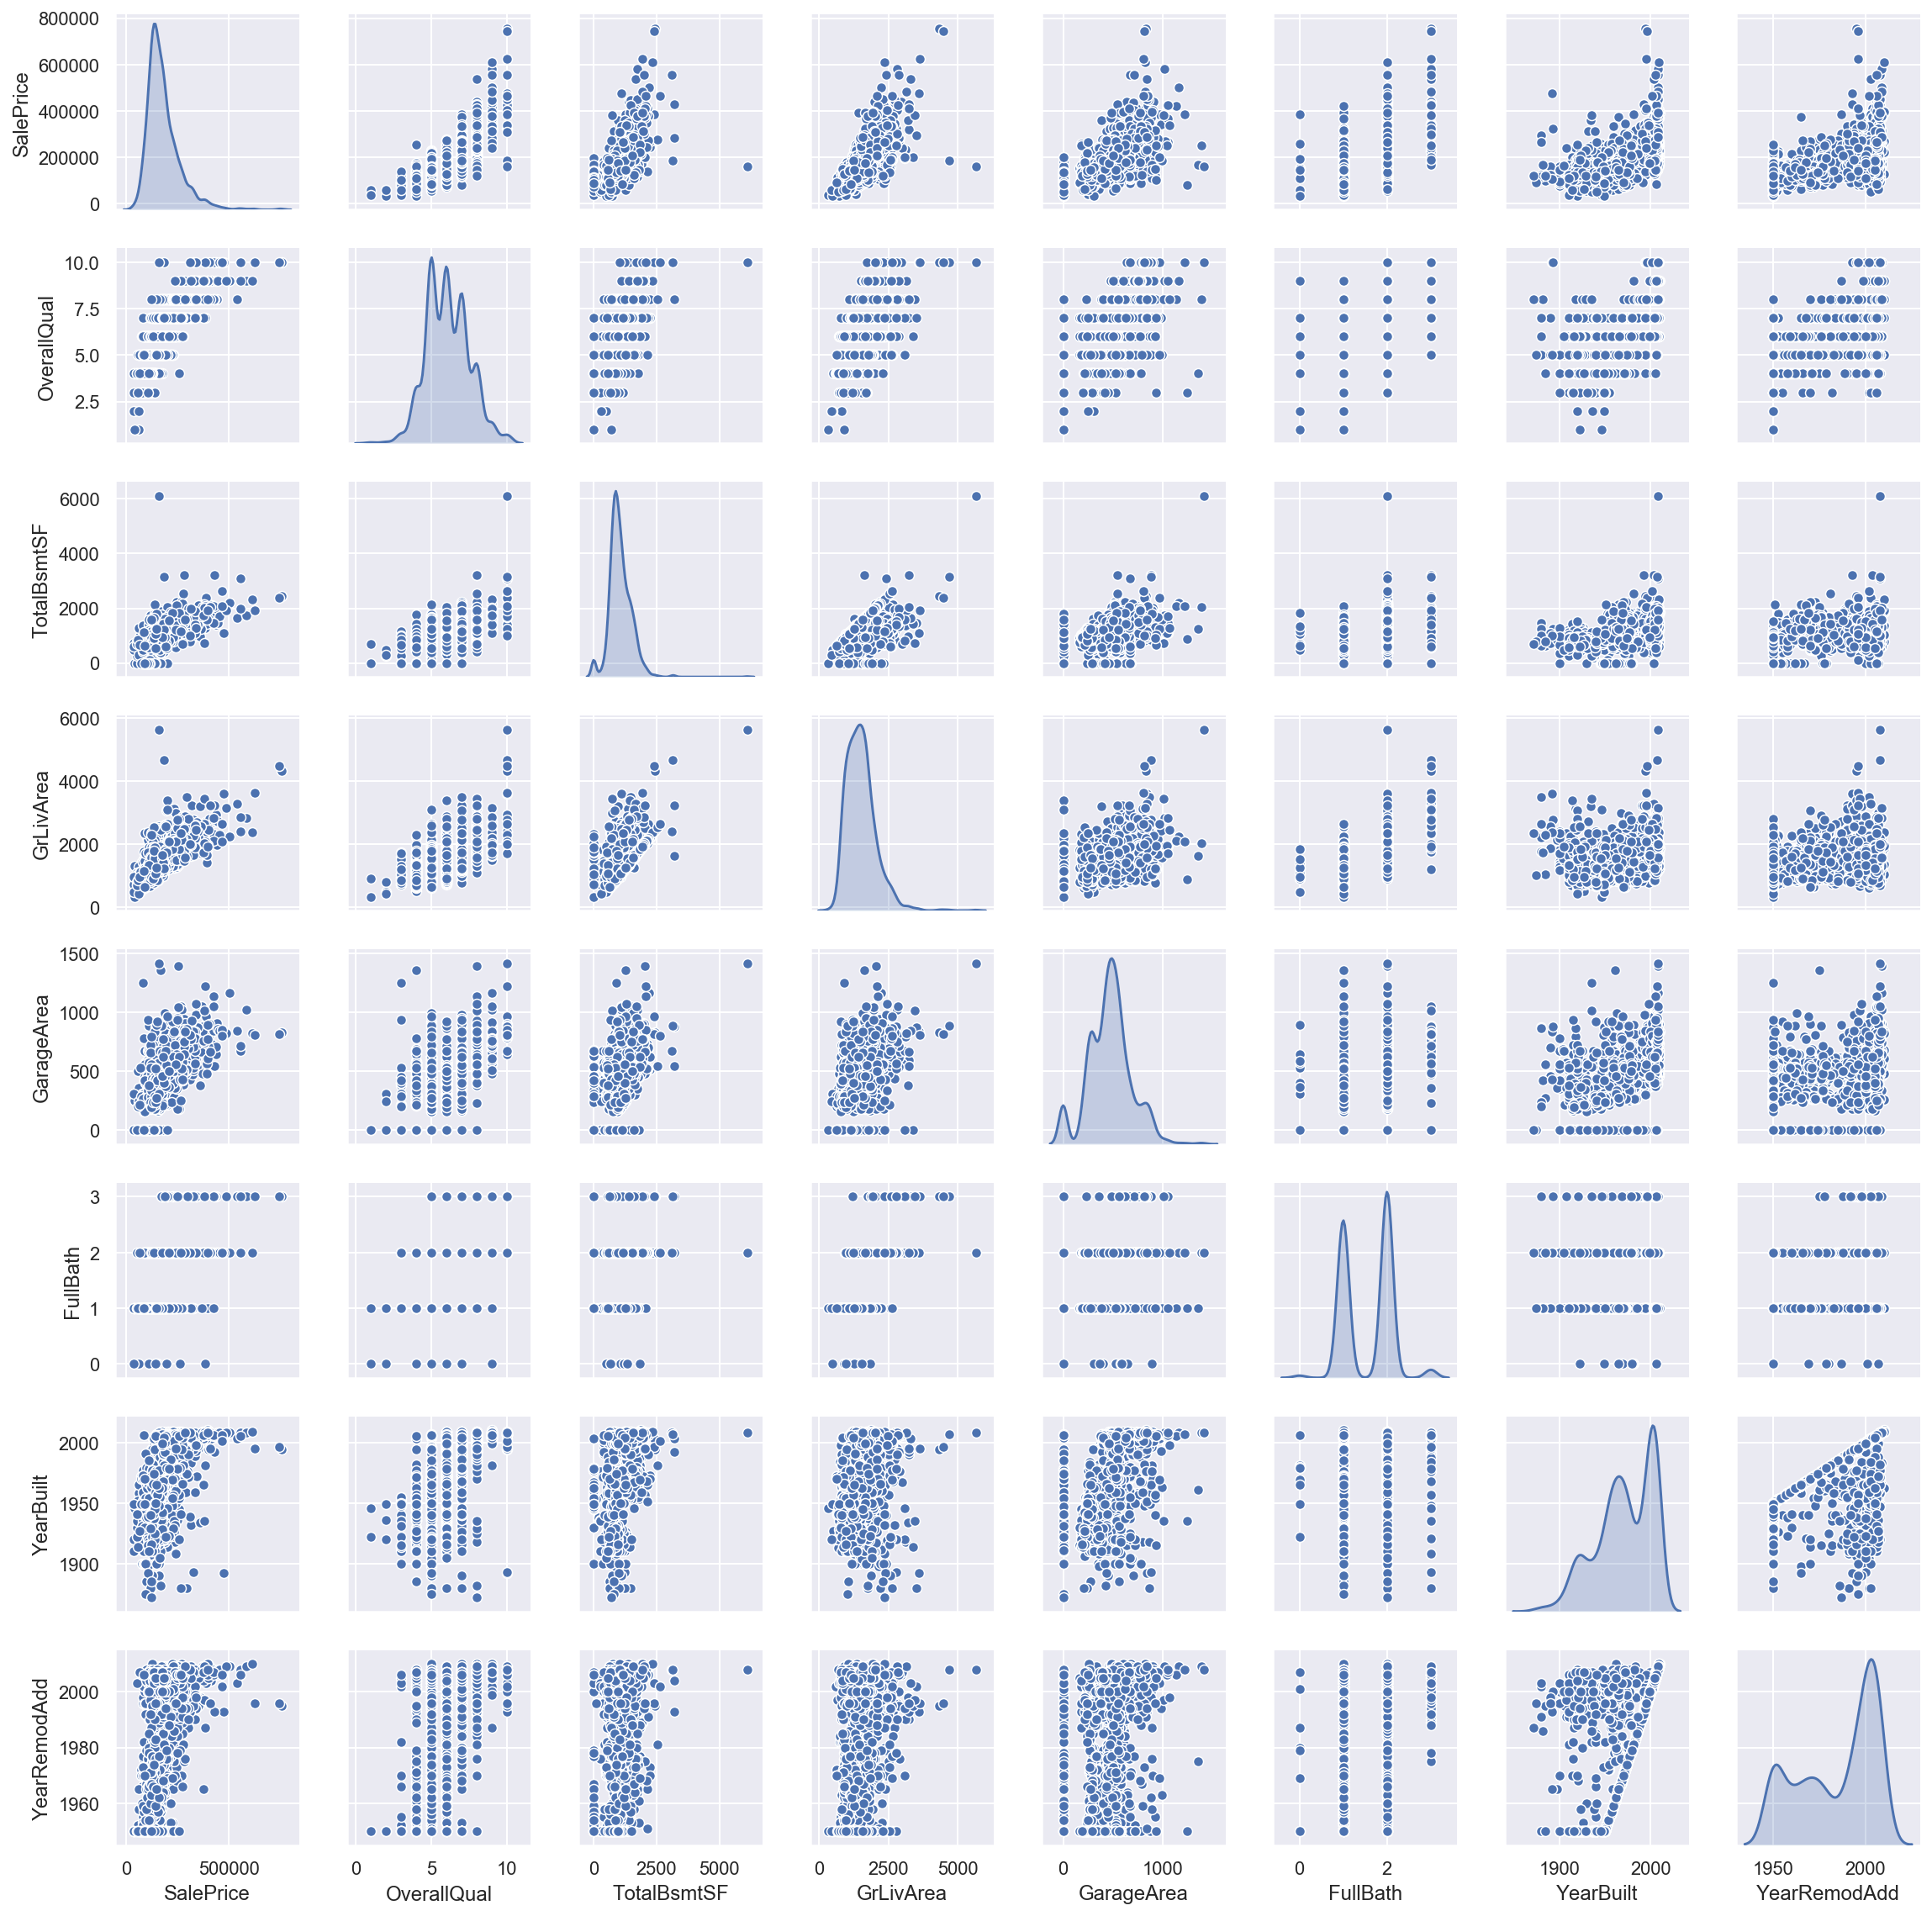

In [16]:
#to see which kind of relationship we have 
sns.set()
columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
sns.pairplot(train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


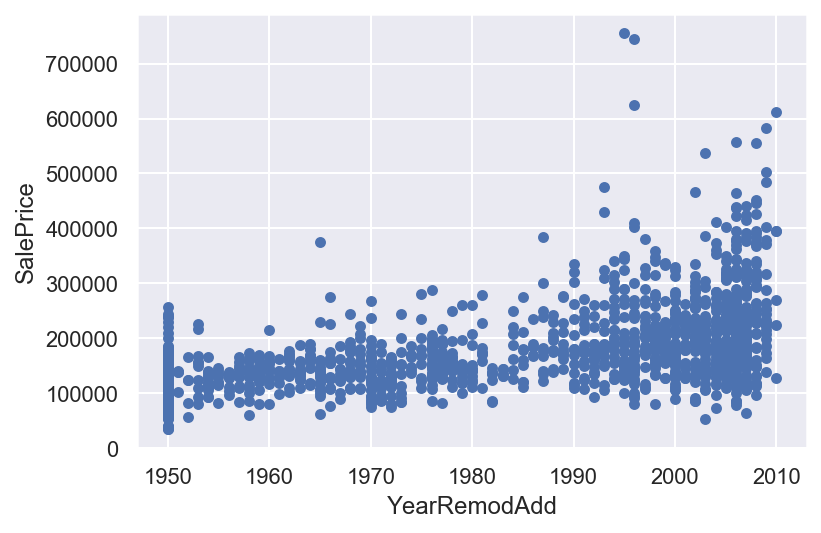

In [17]:
fig, ((ax1, ax2), (ax3, ax4),(ax5,ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
OverallQual_scatter_plot = pd.concat([train_data['SalePrice'],train_data['OverallQual']],axis = 1)
sns.regplot(x='OverallQual',y = 'SalePrice',data = OverallQual_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
TotalBsmtSF_scatter_plot = pd.concat([train_data['SalePrice'],train_data['TotalBsmtSF']],axis = 1)
sns.regplot(x='TotalBsmtSF',y = 'SalePrice',data = TotalBsmtSF_scatter_plot,scatter= True, fit_reg=True, ax=ax2)
GrLivArea_scatter_plot = pd.concat([train_data['SalePrice'],train_data['GrLivArea']],axis = 1)
sns.regplot(x='GrLivArea',y = 'SalePrice',data = GrLivArea_scatter_plot,scatter= True, fit_reg=True, ax=ax3)
GarageArea_scatter_plot = pd.concat([train_data['SalePrice'],train_data['GarageArea']],axis = 1)
sns.regplot(x='GarageArea',y = 'SalePrice',data = GarageArea_scatter_plot,scatter= True, fit_reg=True, ax=ax4)
FullBath_scatter_plot = pd.concat([train_data['SalePrice'],train_data['FullBath']],axis = 1)
sns.regplot(x='FullBath',y = 'SalePrice',data = FullBath_scatter_plot,scatter= True, fit_reg=True, ax=ax5)
YearBuilt_scatter_plot = pd.concat([train_data['SalePrice'],train_data['YearBuilt']],axis = 1)
sns.regplot(x='YearBuilt',y = 'SalePrice',data = YearBuilt_scatter_plot,scatter= True, fit_reg=True, ax=ax6)
YearRemodAdd_scatter_plot = pd.concat([train_data['SalePrice'],train_data['YearRemodAdd']],axis = 1)
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

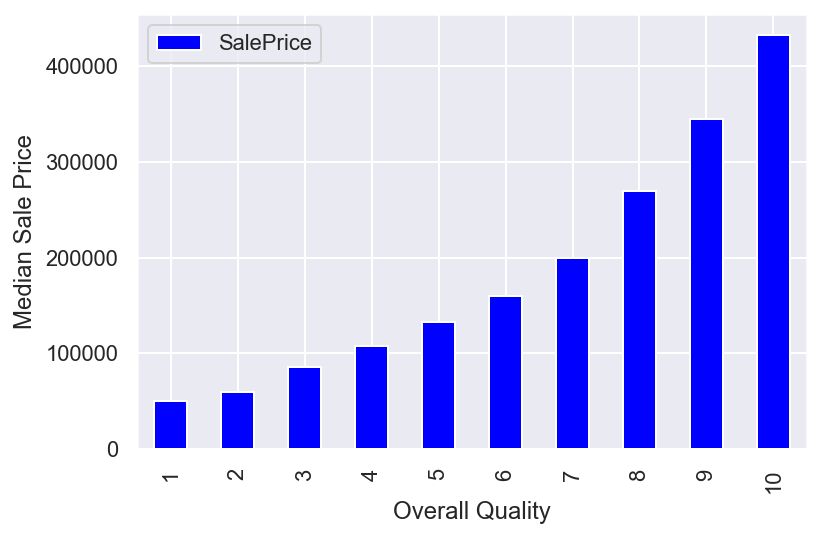

In [18]:
saleprice_overall_quality= train_data.pivot_table(index ='OverallQual',values = 'SalePrice', aggfunc = np.median)
saleprice_overall_quality.plot(kind = 'bar',color = 'blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

In [19]:
var = 'OverallQual'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

(-0.5, 9.5, 0, 800000)

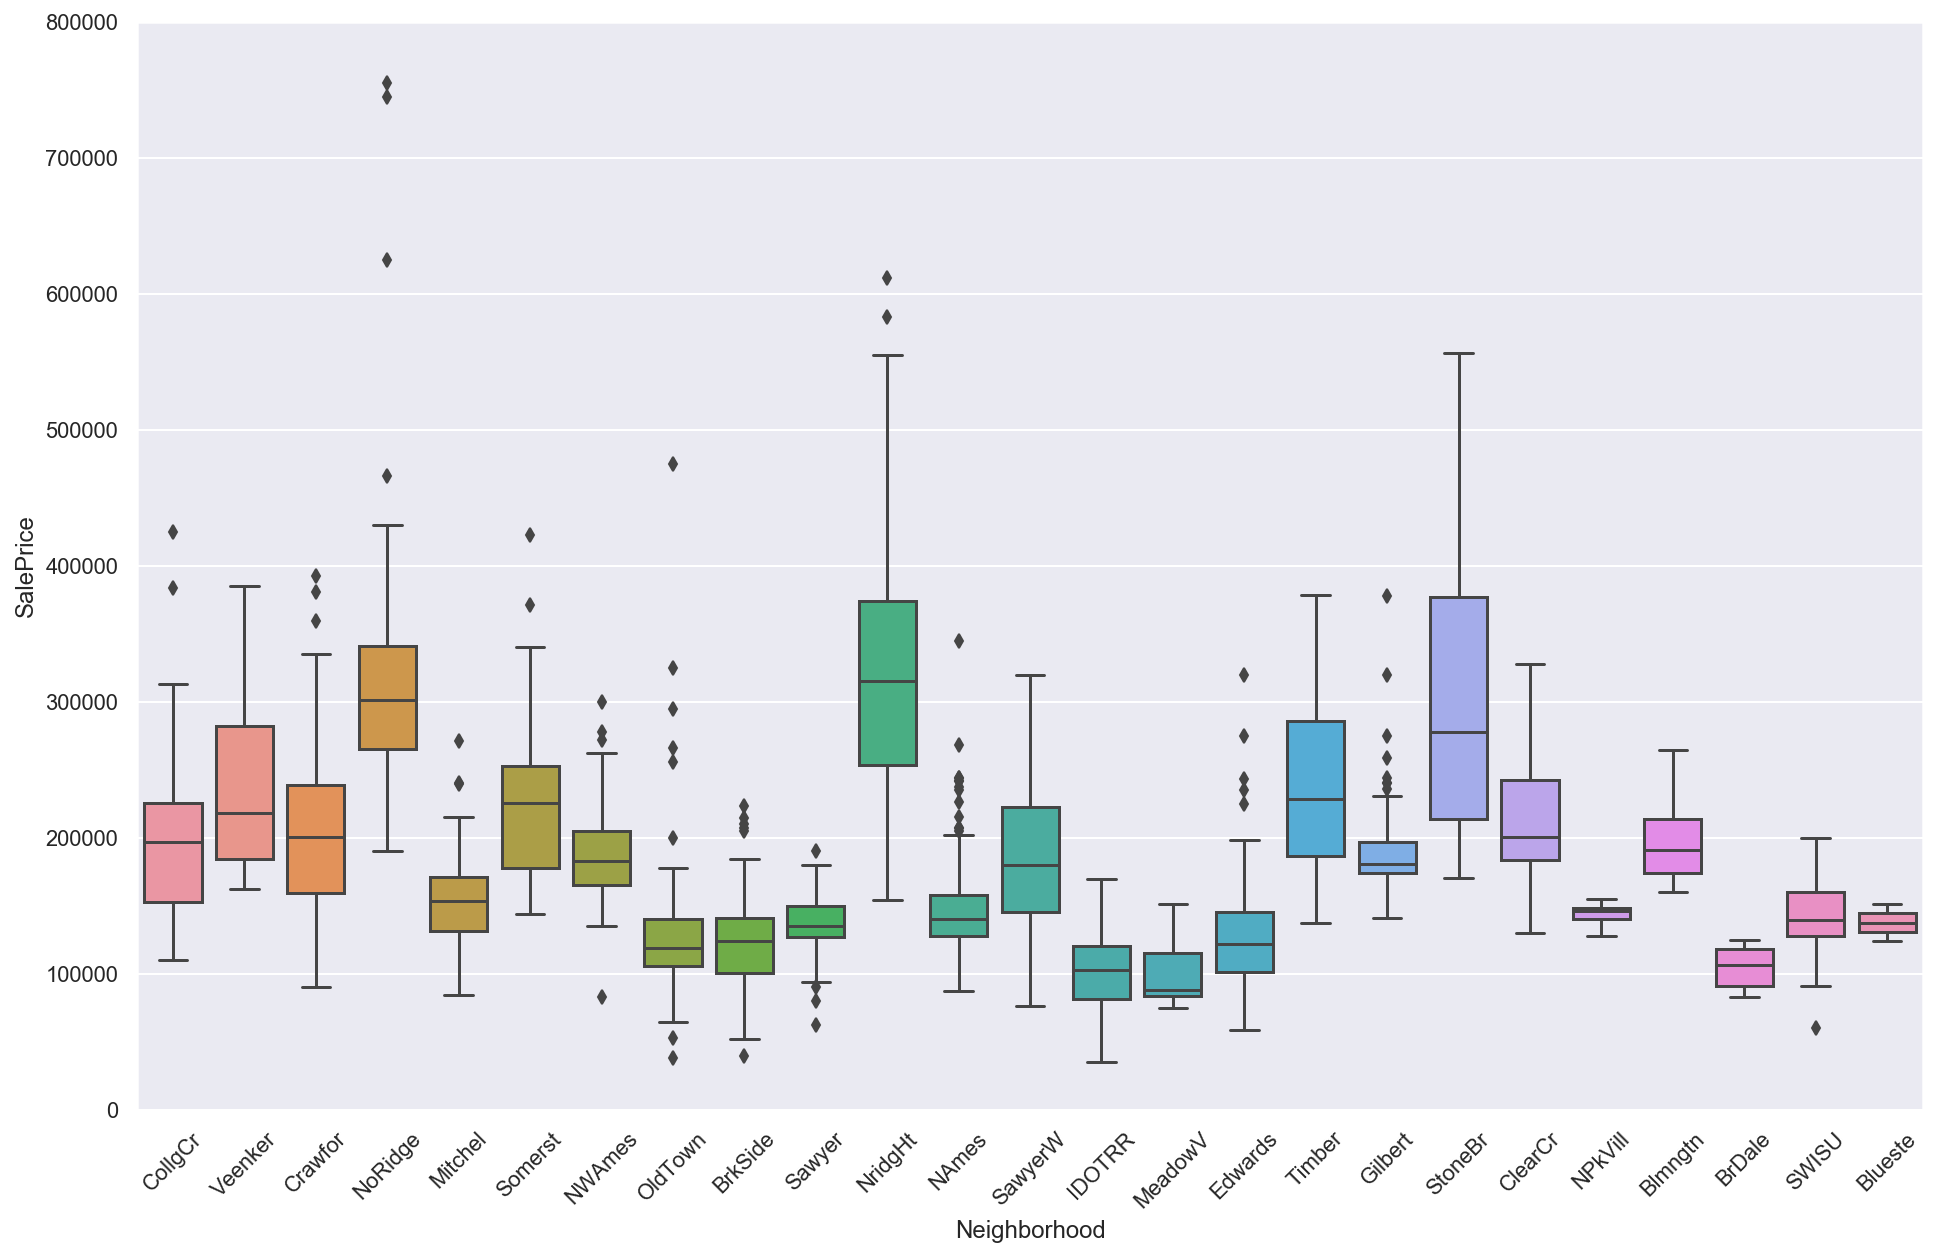

In [20]:
var = 'Neighborhood'
data = pd.concat([train_data['SalePrice'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

In [21]:
k= 11
correlation=train_data.corr()
cols = correlation.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(train_data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


In [22]:
train_data.shape

(1460, 81)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 3. Cleaning trainng data 

## A. Getting the right data types 

In [24]:
#we did this to 3 columns, the observation were originally numbers( int) but each number refer to a certain category
#so we replaced each one to its meaning ( string) we took these definitions from the data description file 

In [25]:
td_MSSubClass_col=     {20: '1-STORY 1946 & NEWER ALL STYLES',
                        30: '1-STORY 1945 & OLDER',
                        40: '1-STORY W/FINISHED ATTIC ALL AGES',
                        45: '1-1/2 STORY - UNFINISHED ALL AGES',
                        50: '1-1/2 STORY FINISHED ALL AGES',
                        60: '2-STORY 1946 & NEWER',
                        70: '2-STORY 1945 & OLDER',
                        75: '2-1/2 STORY ALL AGES',
                        80: 'SPLIT OR MULTI-LEVEL',
                        85: 'SPLIT FOYER',
                        90: 'DUPLEX - ALL STYLES AND AGES',
                        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                        150:'1-1/2 STORY PUD - ALL AGES',
                        160:'2-STORY PUD - 1946 & NEWER',
                        180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                        190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

train_data['MSSubClass']=train_data['MSSubClass'].replace(td_MSSubClass_col)

#train_data.MSSubClass.value_counts()

In [26]:
OverallQual_col=     {10:"Very Excellent",
                      9:"Excellent",
                       8:"Very Good",
                       7:"Good",
                       6:"Above Average",
                       5:"Average",
                       4:"Below Average",
                       3:"Fair",
                       2:"Poor",
                       1:"Very Poor"}


train_data['OverallQual']=train_data['OverallQual'].replace(OverallQual_col)

#train_data.OverallQual.value_counts()

In [27]:
OverallCond_col = {10:"Very Excellent",
                   9:"Excellent",
                   8:"Very Good",
                   7:"Good",
                   6:"Above Average",
                   5:"Average",
                   4:"Below Average",
                   3:"Fair",
                   2:"Poor",
                   1:"Very Poor"}

train_data['OverallCond']=train_data['OverallCond'].replace(OverallCond_col)


#train_data.OverallCond.value_counts()

## B. Treating missing data in train datasets:

In [28]:
# to check how many null cells we have in every column 
train_data.isnull().sum().sort_values(ascending = False).head()

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
dtype: int64

In [29]:
# we replaced each null cells with eather the median if the column's type were organnly int or flout.
#otherwise we replaced it with the mode  if it was catagorical.

In [30]:
train_data.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [31]:
#print("LotFrontage median = ",train_data.LotFrontage.median())
#print ("MasVnrArea median = ",train_data.MasVnrArea.median())

In [32]:
train_data["PoolQC"].fillna("No Pool",inplace=True)
train_data["Electrical"].fillna("SBrkr",inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)
train_data["LotFrontage"].fillna(69,inplace=True)
train_data["MasVnrType"].fillna("None",inplace=True)
train_data["FireplaceQu"].fillna("No Fireplace",inplace=True)
train_data["MiscFeature"].fillna("standerd",inplace=True)
train_data["Alley"].fillna("No alley access",inplace=True)
train_data["Fence"].fillna("No Fence",inplace=True)
train_data["GarageCond"].fillna("No Garage",inplace=True)
train_data["GarageType"].fillna("No Garage",inplace=True)
train_data["GarageYrBlt"].fillna(0,inplace=True)
train_data["GarageFinish"].fillna("No Garage",inplace=True)
train_data["BsmtExposure"].fillna("No Basement",inplace=True)
train_data["GarageQual"].fillna("No Garage",inplace=True)
train_data["BsmtFinType2"].fillna("No Basement",inplace=True)
train_data["BsmtCond"].fillna("No Basement",inplace=True)
train_data["BsmtFinType1"].fillna("No Basement",inplace=True)
train_data["BsmtQual"].fillna("No Basement",inplace=True)

# 4. EDA on test_data 

In [33]:
test_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [34]:
test_data.shape

(1459, 80)

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

# 5.cleaning  the test data

## A. Treating missing data in test datasets:

In [36]:
# to check how many null cells we have in every column 
test_data.isnull().sum().sort_values(ascending = False).head() 

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
dtype: int64

In [37]:
#test_data.MSZoning.value_counts()
test_data["MSZoning"].fillna("RL",inplace=True)

#test_data.LotFrontage.median()
test_data["LotFrontage"].fillna(67,inplace=True)

test_data["Alley"].fillna("No alley access",inplace=True)

#test_data.Utilities.value_counts()
test_data["Utilities"].fillna("AllPub",inplace=True)

#test_data.Exterior1st.value_counts()
test_data["Exterior1st"].fillna("VinylSd",inplace=True)

#test_data.Exterior2nd.value_counts()
test_data["Exterior2nd"].fillna("VinylSd",inplace=True)

#test_data.BsmtQual.value_counts()
test_data["BsmtQual"].fillna("No Basement",inplace=True)

#test_data.MasVnrType.value_counts()
test_data["MasVnrType"].fillna("None",inplace=True)

#test_data.BsmtCond.value_counts()
test_data["BsmtCond"].fillna("No Basement",inplace=True)

#test_data.BsmtExposure.value_counts()
test_data["BsmtExposure"].fillna("No Basement",inplace=True)

#test_data.PoolQC.value_counts()
test_data["PoolQC"].fillna("No Pool",inplace=True)

#test_data.MiscFeature.value_counts()
test_data["MiscFeature"].fillna("None",inplace=True)

#test_data.MiscFeature.value_counts()
test_data["MiscFeature"].fillna("None",inplace=True)

#test_data.Fence.value_counts()
test_data["Fence"].fillna("No Fence",inplace=True)

#test_data.FireplaceQu.value_counts()
test_data["FireplaceQu"].fillna("No Fireplace",inplace=True)

#test_data.GarageYrBlt.value_counts()
test_data["GarageYrBlt"].fillna(0,inplace=True)

#test_data.GarageCond.value_counts()
test_data["GarageCond"].fillna("No Garage",inplace=True)

#test_data.GarageFinish.value_counts()
test_data["GarageFinish"].fillna("No Garage",inplace=True)

#test_data.GarageQual.value_counts()
test_data["GarageQual"].fillna("No Garage",inplace=True)

#test_data.GarageType.value_counts()
test_data["GarageType"].fillna("No Garage",inplace=True)

#test_data.BsmtFinType2.value_counts()
test_data["BsmtFinType2"].fillna("No Basement",inplace=True)

#test_data.BsmtFinType1.value_counts()
test_data["BsmtFinType1"].fillna("No Basement",inplace=True)

#test_data.MasVnrArea.value_counts()
test_data["MasVnrArea"].fillna(0,inplace=True)

#test_data.Functional.value_counts()
test_data["Functional"].fillna("Typ",inplace=True)

#test_data.BsmtFullBath.value_counts()
test_data["BsmtFullBath"].fillna(0,inplace=True)

#test_data.BsmtUnfSF.value_counts()
test_data["BsmtUnfSF"].fillna(0,inplace=True)

#test_data.TotalBsmtSF.value_counts()
test_data["TotalBsmtSF"].fillna(0,inplace=True)

#test_data.BsmtHalfBath.value_counts()
test_data["BsmtHalfBath"].fillna(0,inplace=True)

#test_data.BsmtFinSF2.value_counts()
test_data["BsmtFinSF2"].fillna(0,inplace=True)

#test_data.SaleType.value_counts()
test_data["SaleType"].fillna("WD",inplace=True)

#test_data.BsmtFinSF1.value_counts()
test_data["BsmtFinSF1"].fillna(0,inplace=True)

#test_data.GarageCars.value_counts()
test_data["GarageCars"].fillna(2,inplace=True)

# t=test_data[test_data.GarageArea.isnull()]
# t[["GarageArea","GarageCars"]]
#test_data.groupby(by="GarageCars").mean()
# the mean of GarageArea with 2 cars (just like the null cell here) is 519.042857
#test_data.GarageArea.value_counts()
test_data["GarageArea"].fillna(519.042857,inplace=True)

# k=test_data[test_data.KitchenQual.isnull()]
# test_data.loc[ :,["KitchenQual","KitchenAbvGr"]].groupby(by="KitchenAbvGr").describe()
# we saw that TA is the most frequent (KitchenQual) whenver the (KitchenAbvGr) is equal to 1, which is the case here
# in the null cell
#test_data.KitchenQual.value_counts()
test_data["KitchenQual"].fillna("TA",inplace=True)


## B. Gitting the right data types: Test-data

In [38]:
td_MSSubClass_col=     {20: '1-STORY 1946 & NEWER ALL STYLES',
                        30: '1-STORY 1945 & OLDER',
                        40: '1-STORY W/FINISHED ATTIC ALL AGES',
                        45: '1-1/2 STORY - UNFINISHED ALL AGES',
                        50: '1-1/2 STORY FINISHED ALL AGES',
                        60: '2-STORY 1946 & NEWER',
                        70: '2-STORY 1945 & OLDER',
                        75: '2-1/2 STORY ALL AGES',
                        80: 'SPLIT OR MULTI-LEVEL',
                        85: 'SPLIT FOYER',
                        90: 'DUPLEX - ALL STYLES AND AGES',
                        120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                        150:'1-1/2 STORY PUD - ALL AGES',
                        160:'2-STORY PUD - 1946 & NEWER',
                        180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                        190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

test_data['MSSubClass']=test_data['MSSubClass'].replace(td_MSSubClass_col)

In [39]:
OverallQual_col=     {10:"Very Excellent",
                      9:"Excellent",
                       8:"Very Good",
                       7:"Good",
                       6:"Above Average",
                       5:"Average",
                       4:"Below Average",
                       3:"Fair",
                       2:"Poor",
                       1:"Very Poor"}


test_data['OverallQual']=test_data['OverallQual'].replace(OverallQual_col)

In [40]:
OverallCond_col = {10:"Very Excellent",
                   9:"Excellent",
                   8:"Very Good",
                   7:"Good",
                   6:"Above Average",
                   5:"Average",
                   4:"Below Average",
                   3:"Fair",
                   2:"Poor",
                   1:"Very Poor"}

test_data['OverallCond']=test_data['OverallCond'].replace(OverallCond_col)

____
____
____

# 7. Visualization ( After filling the missing data)

In [41]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [42]:
# Let’s first plot the distribution of the target variable. 
# We will use the histogram plot function from the matplotlib library.

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(train_data['SalePrice'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [43]:
plt.figure(figsize=(20, 5))

features = ['SaleType', 'SaleCondition']
target = train_data['SalePrice']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

<Figure size 720x720 with 0 Axes>

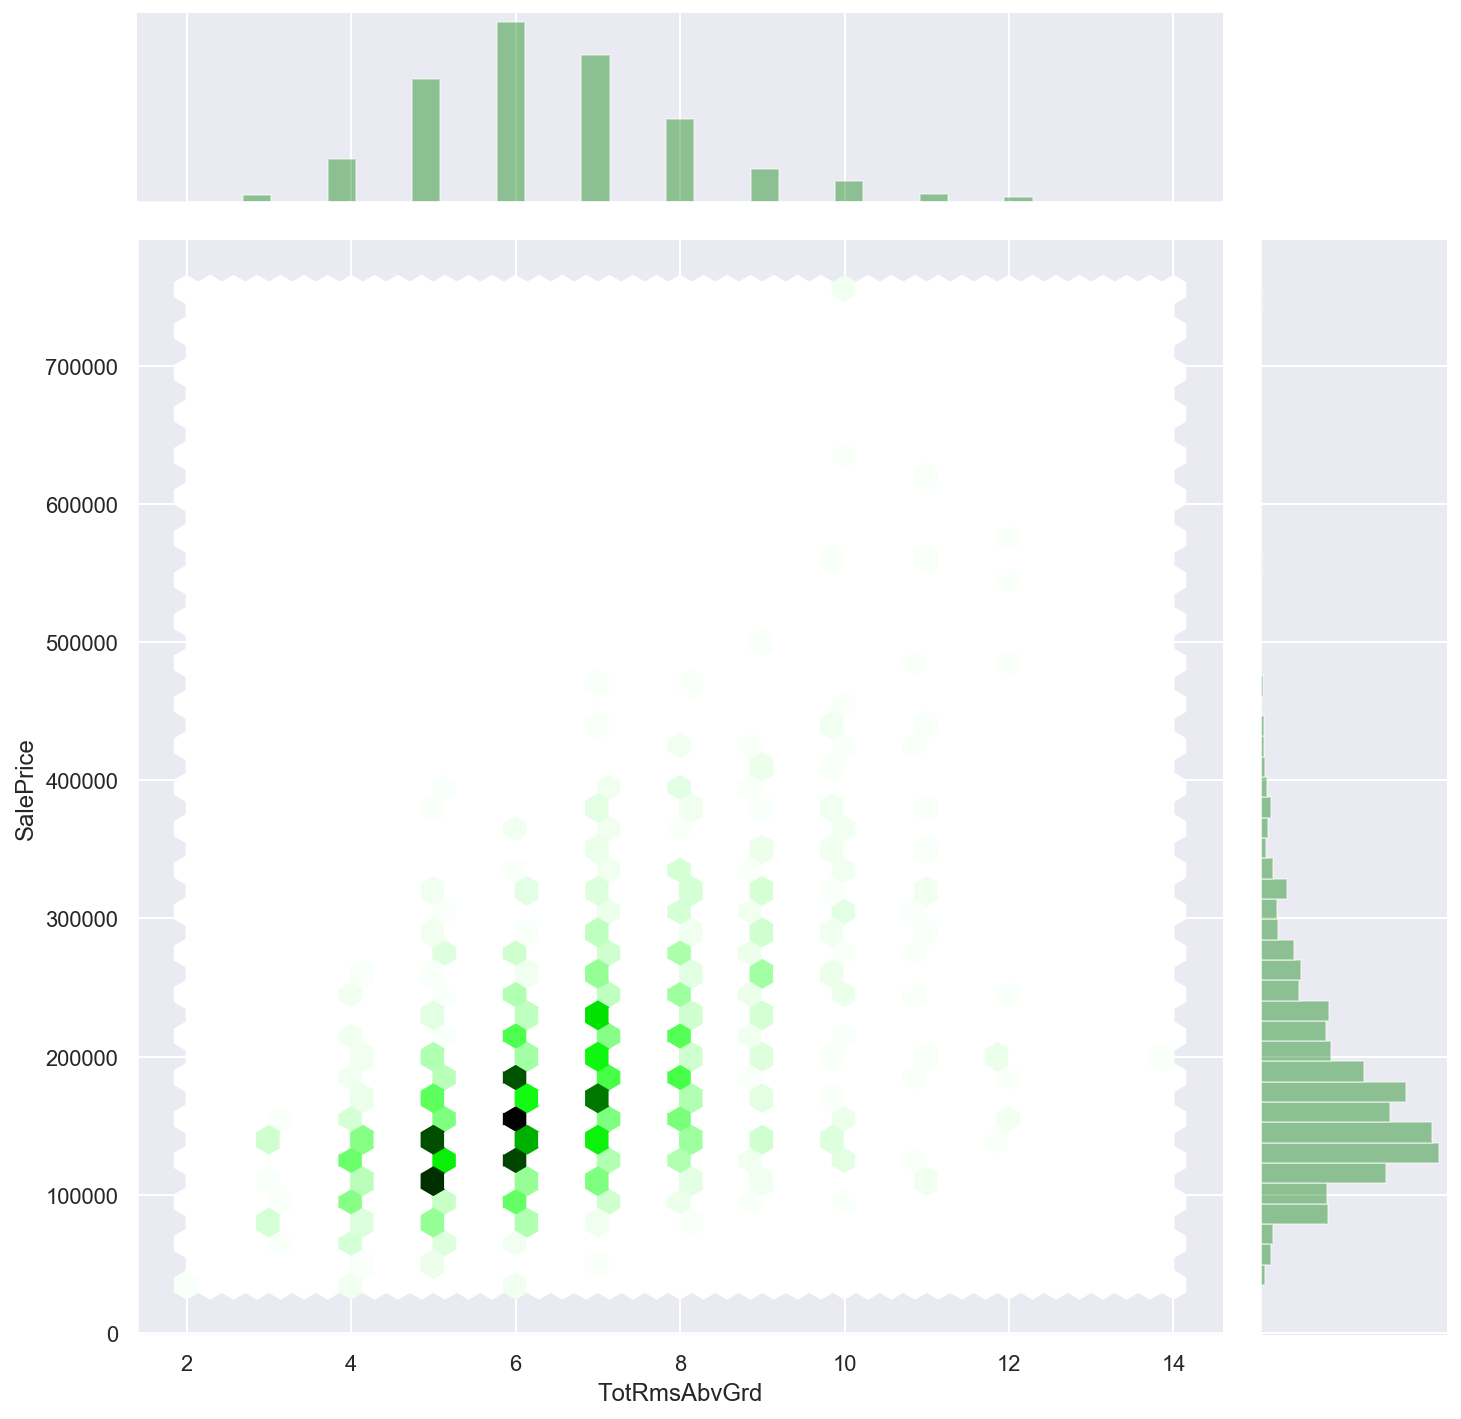

In [44]:
# Jointplots for high correlations - no. of rooms


plt.figure (figsize=(10,10))
sns.jointplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = train_data, kind = 'hex', color = 'green', height = 10)

In [45]:
# Jointplots for high correlations 

plt.figure (figsize=(10,10))
sns.jointplot(x = 'YearBuilt', y = 'SalePrice', data = train_data, kind = 'reg', height = 10, color = 'orange');

<Figure size 720x720 with 0 Axes>

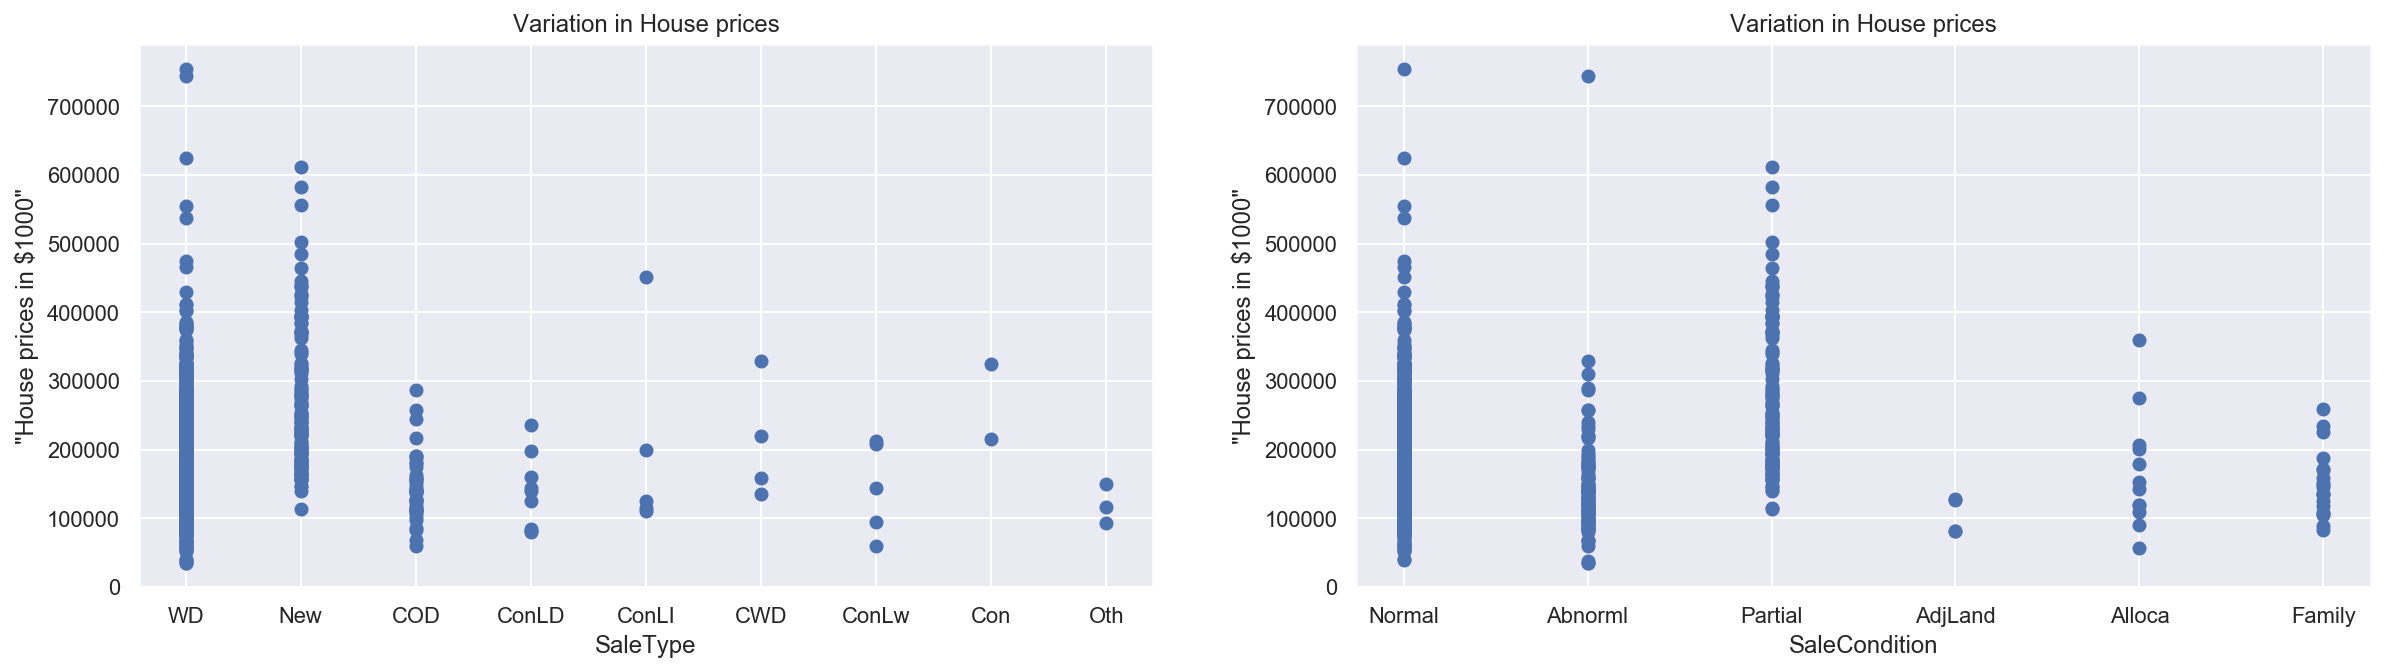

In [46]:
plt.figure(figsize=(20, 5))

features = ['SaleType', 'SaleCondition']
target = train_data['SalePrice']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = train_data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

____
____
____

# 8. Splittng the train data into two datasets

## A. without outliers ( train_no_std)

Text(0.5, 1, 'Correlation')

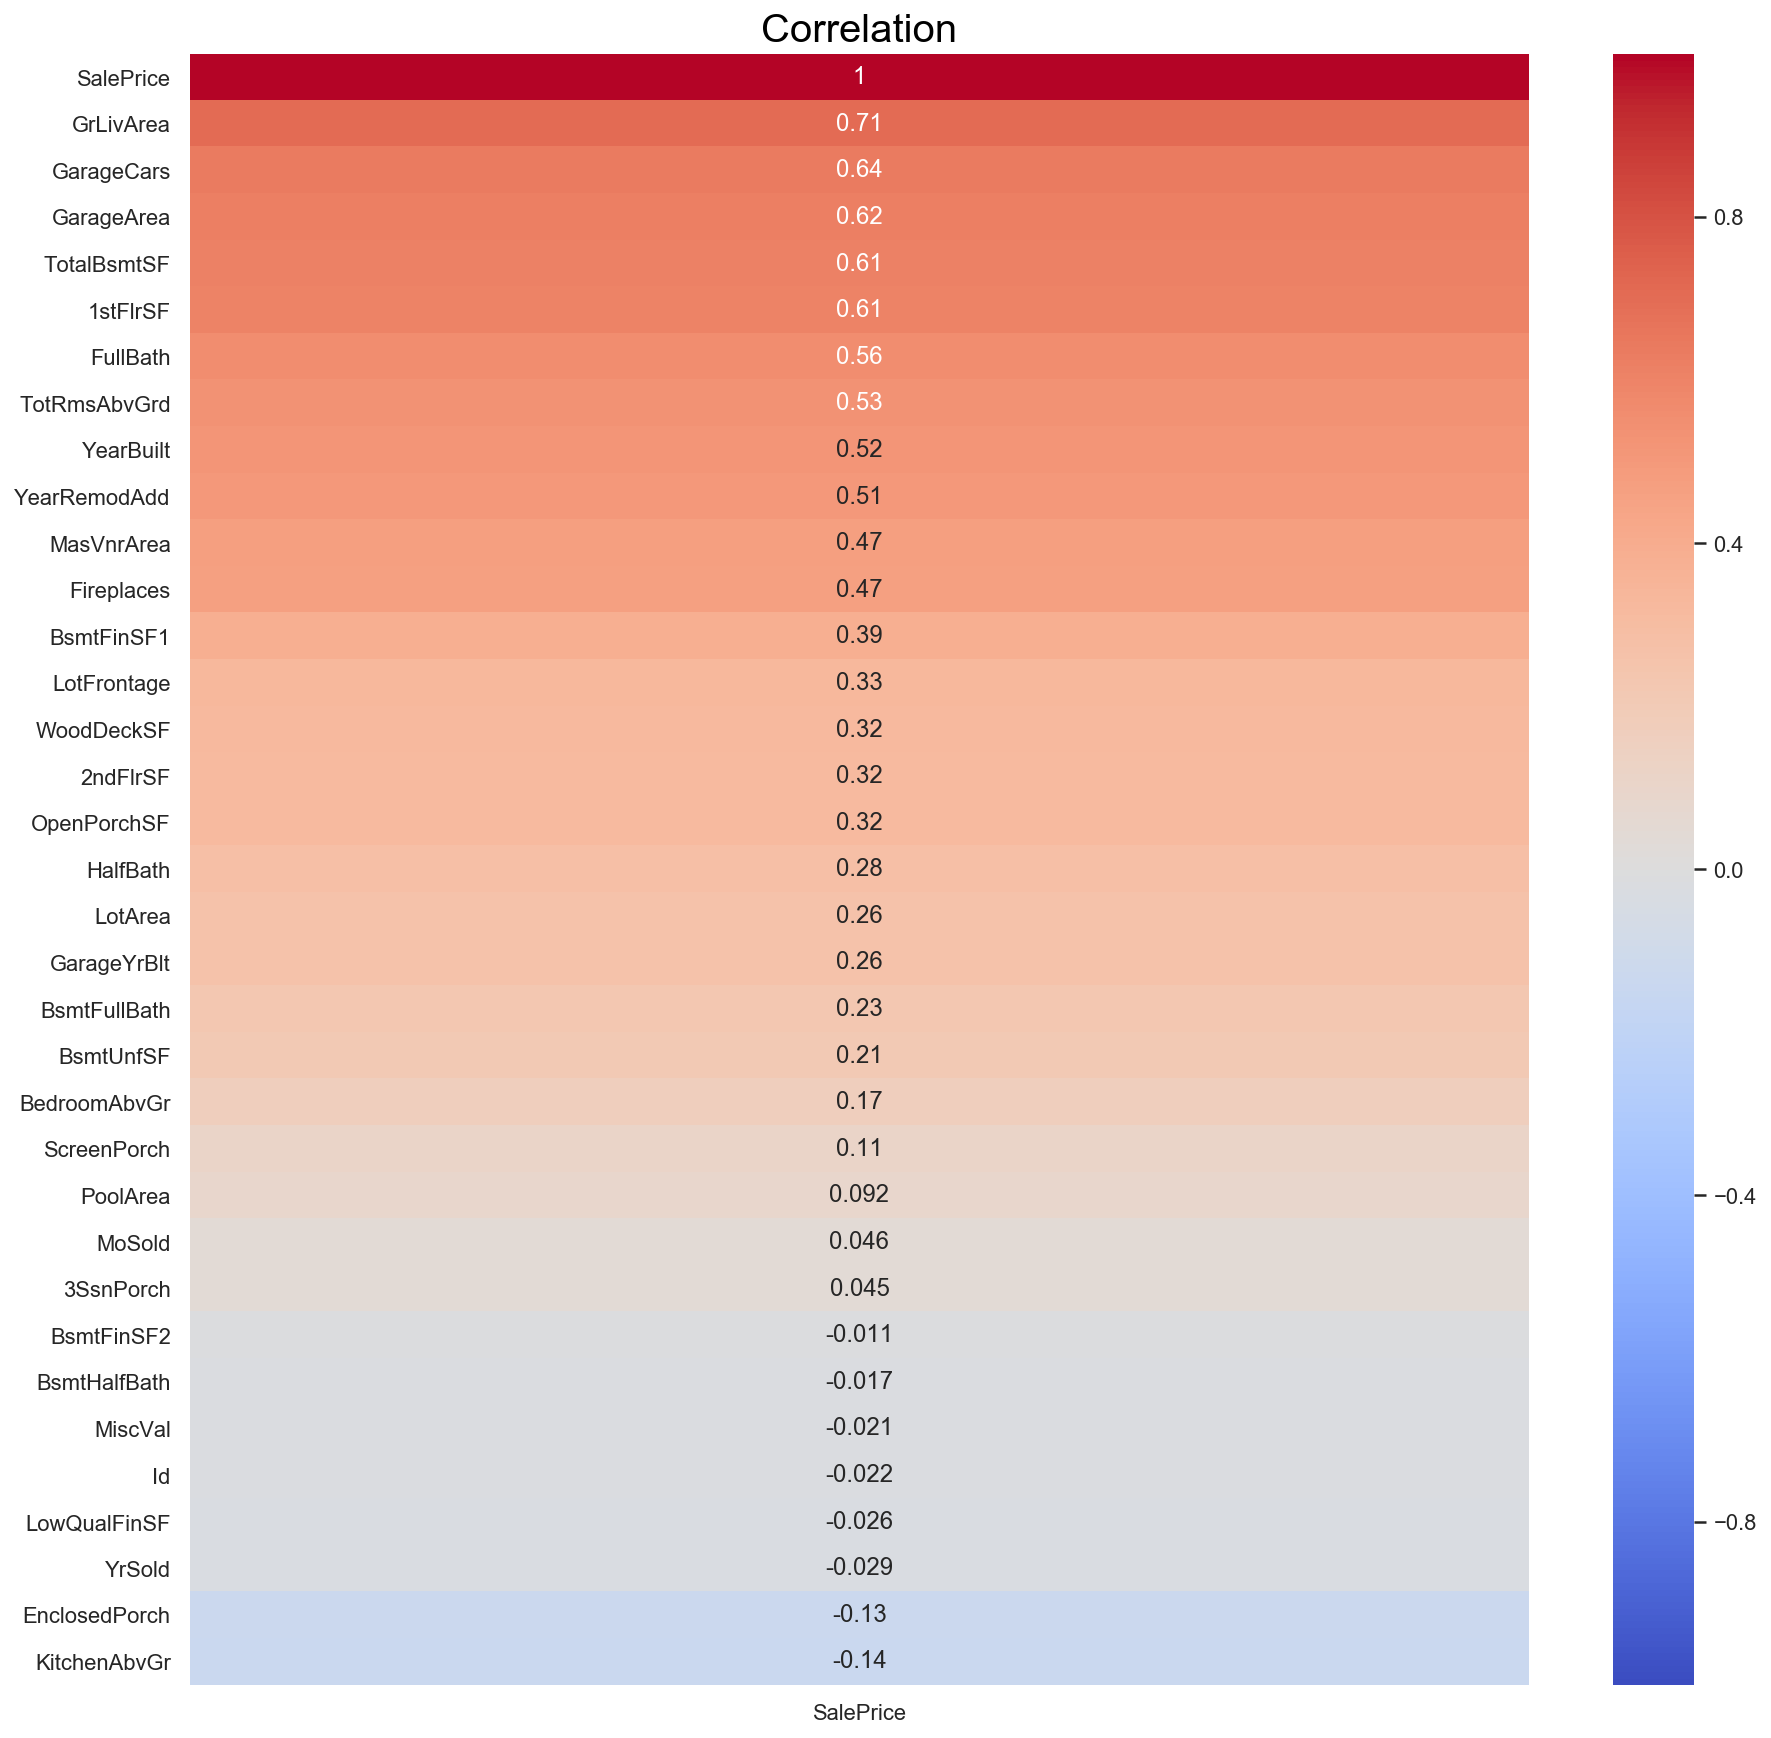

In [47]:
# extracting only the numeric columns from the training data, why?
# because after getting dummies, and scaling, the dummy columns will have only 2 numbers
#and we want to remove outliers but we can't rely on those, because they weren't originally numbers.
#and the numeric values they represent aren't real.
# later on we do a heatmap to find the most numaric featuers that effect the saleprice (target)

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

r = train_data.select_dtypes(include=numerics)

scaler = StandardScaler()
r_std = pd.DataFrame(scaler.fit_transform(r),columns = r.columns)

fig = plt.figure(figsize= (15,15))
corr=r_std.corr()
sns.heatmap(corr[['SalePrice']].sort_values(by=['SalePrice'],ascending=False),
            vmin=-1,
            cmap='coolwarm',
            annot=True);
font = {
        'color':  'black',
        'weight': 'normal',
        'size': 20,
        }
plt.title ("Correlation",fontdict=font)





In [48]:
train_data.shape

(1460, 81)

In [49]:
X= train_data.iloc[:,0:80]

X_dum=pd.get_dummies(X)
y=train_data["SalePrice"]

#adding columns that will exist in the testing data if you get dummies in it.
#make them equal to zero in the trainng data
u=['MSSubClass_1-1/2 STORY PUD - ALL AGES', 'MiscFeature_None']
for i in u:
    X_dum[i]=0


scaler = StandardScaler()
train_no_std = pd.DataFrame(scaler.fit_transform(X_dum),columns = X_dum.columns)
train_no_std.shape

(1460, 336)

### we selected the fetuers that have 0.5 or more in the heatmap to remove the outliers.
### the approch we followed was the same as the IQR approch but with the standerdevation, see the picture below.

Screen Shot 2019-10-11 at 16.41.56

In [50]:
train_no_std["GrLivArea"]=train_no_std["GrLivArea"].apply(lambda x:np.nan if x<-2.69 or x>2.69 else x)
#train_no_std["TotalBsmtSF"]=train_no_std["TotalBsmtSF"].apply(lambda x:np.nan if x<-2.69 or x>2.69 else x)
#train_no_std["GarageArea"]=train_no_std["GarageArea"].apply(lambda x:np.nan if x<-2.69 or x>2.69 else x)
train_no_std["GarageCars"]=train_no_std["GarageCars"].apply(lambda x:np.nan if x<-2.69 or x>2.69 else x)
#train_no_std["1stFlrSF"]=train_no_std["1stFlrSF"].apply(lambda x:np.nan if x<-2.69 or x>2.69 else x)
#train_no_std["FullBath"]=train_no_std["FullBath"].apply(lambda x:np.nan if x<-1.96 or x>1.96 else x)
#train_no_std["TotRmsAbvGrd"]=train_no_std["TotRmsAbvGrd"].apply(lambda x:np.nan if x<-1.96 or x>1.96 else x)
#train_no_std["YearBuilt"]=train_no_std["YearBuilt"].apply(lambda x:np.nan if x<-1.96 or x>1.96 else x)
#train_no_std["YearRemodAdd"]=train_no_std["YearRemodAdd"].apply(lambda x:np.nan if x<-1.96 or x>1.96 else x)

In [51]:
train_no_std["SalePrice"]=y

In [52]:
train_no_std.shape

(1460, 337)

In [53]:
train_no_std.dropna(inplace= True)

In [54]:
train_no_std.shape

(1435, 337)

In [55]:
train_no_std.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0 -1.730865    -0.220875 -0.207142   1.050994      0.878668    0.514104   
1 -1.728492     0.460320 -0.091886   0.156734     -0.429577   -0.570750   
2 -1.726120    -0.084636  0.073480   0.984752      0.830215    0.325915   
3 -1.723747    -0.447940 -0.096897  -1.863632     -0.720298   -0.570750   
4 -1.721374     0.641972  0.375148   0.951632      0.733308    1.366489   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_WD  \
0    0.575425   -0.288653  -0.944591    -0.459303  ...     0.390293   
1    1.171992   -0.288653  -0.641228     0.466465  ...     0.390293   
2    0.092907   -0.288653  -0.301643    -0.313369  ...     0.390293   
3   -0.499274   -0.288653  -0.061670    -0.687324  ...     0.390293   
4    0.463568   -0.288653  -0.174865     0.199680  ...     0.390293   

   SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0              -0.272616              -0.052414             -0.091035   
1              -0.272616              -0.052414             -0.091035   
2              -0.272616              -0.052414             -0.091035   
3               3.668167              -0.052414             -0.091035   
4              -0.272616              -0.052414             -0.091035   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0             -0.117851              0.467651              -0.305995   
1             -0.117851              0.467651              -0.305995   
2             -0.117851              0.467651              -0.305995   
3             -0.117851             -2.138345              -0.305995   
4             -0.117851              0.467651              -0.305995   

   MSSubClass_1-1/2 STORY PUD - ALL AGES  MiscFeature_None  SalePrice  
0                                    0.0               0.0     208500  
1                                    0.0               0.0     181500  
2                                    0.0               0.0     223500  
3                                    0.0               0.0     140000  
4                                    0.0               0.0     250000  

[5 rows x 337 columns]

## B. without deleiting the outliers (train_standerdized)

In [56]:
train_data.head()

Id                       MSSubClass MSZoning  LotFrontage  LotArea Street  \
0   1             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1   2  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2   3             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3   4             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4   5             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

             Alley LotShape LandContour Utilities  ... PoolArea   PoolQC  \
0  No alley access      Reg         Lvl    AllPub  ...        0  No Pool   
1  No alley access      Reg         Lvl    AllPub  ...        0  No Pool   
2  No alley access      IR1         Lvl    AllPub  ...        0  No Pool   
3  No alley access      IR1         Lvl    AllPub  ...        0  No Pool   
4  No alley access      IR1         Lvl    AllPub  ...        0  No Pool   

      Fence MiscFeature MiscVal MoSold YrSold SaleType SaleCondition  \
0  No Fence    standerd       0      2   2008       WD        Normal   
1  No Fence    standerd       0      5   2007       WD        Normal   
2  No Fence    standerd       0      9   2008       WD        Normal   
3  No Fence    standerd       0      2   2006       WD       Abnorml   
4  No Fence    standerd       0     12   2008       WD        Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 81 columns]

In [57]:
train_data.shape

(1460, 81)

In [58]:
t= train_data.iloc[:,0:80]
t_dummy=pd.get_dummies(t)
z=train_data["SalePrice"]

In [59]:
#adding columns that will exist in the testing data if you get dummies in it.
#make them equal to zero in the trainng data

u=['MSSubClass_1-1/2 STORY PUD - ALL AGES', 'MiscFeature_None']
for i in u:
    t_dummy["MSSubClass_1-1/2 STORY PUD - ALL AGES"]=0
    t_dummy["MiscFeature_None"]=0

In [60]:
scaler = StandardScaler()
train_standerdized = pd.DataFrame(scaler.fit_transform(t_dummy),columns = t_dummy.columns)
train_standerdized.shape

(1460, 336)

In [61]:
train_standerdized["SalePrice"]=z

In [62]:
train_standerdized.shape

(1460, 337)

# 9. Bulding the models 

## A. Testing on the data without outliers (train_no_std)
1- lasso 

2- ridge

3- Elastic Net Cv 

4- randome forest 

5- randome forest  GridSearchCV

## lasso 

In [63]:
# we are testing the no outlier module train_no_std

X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [65]:
# create a LassoCV model instance
model = LassoCV(alphas=np.logspace(-4, 4, 1000), cv=5) 

# fit the model
model.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model.alpha_)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508679802.5029297, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531517428.0776367, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589466816.31604, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599460698.0331421, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593432530.365387, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603741649.6082153, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670274153.2661438, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669456303.3838501, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 668672123.3980103, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663852208.5527954, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663440162.197876, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 663035160.154541, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 653025350.6578674, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644043554.2744141, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647148109.475708, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646899283.4028015, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646782932.7070312, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 646668688.5855713, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645800482.6108093, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645751118.8974609, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 645698964.6534424, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644337880.6462708, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644303762.5954285, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 644270241.751709, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643449634.0592651, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643431738.6224976, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 643414118.0393677, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642983307.6359558, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642974061.0723572, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642964681.3659363, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642743863.2625732, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642738459.2402649, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642733699.4399414, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642623897.9176636, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642621354.7133179, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642618129.0847168, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642551508.9608154, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642550624.1000366, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642548697.3719482, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642514011.1920166, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642514778.6206665, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642513842.1142883, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642495287.826416, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642492783.6152344, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642495137.9664917, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642483481.074707, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642480195.5447998, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642483676.4364929, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642478102.4842529, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642486322.7689209, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642472964.5845337, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642464393.8695679, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642494016.9581909, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 642466221.086029, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 499850089.0350647, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545831415.0184326, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 577611050.526001, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 620387349.7429504, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619762703.756012, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619150449.0784302, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610520784.3667603, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610168689.1900024, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 609822596.9036865, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594692223.8609009, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594489685.3787842, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594291390.4407959, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603516289.5078735, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603406387.0110168, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 603297435.662323, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600572193.1939697, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600512506.2552185, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600544503.7647095, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592884761.7129822, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592853537.1346741, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592822889.4343872, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592071736.7181396, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592055322.8754883, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 592039212.0545044, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591644818.152832, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591636278.8226929, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591627830.5421143, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591420676.1123047, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591416433.6934814, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591411947.9467773, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591303367.4867859, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591301061.742981, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591298476.458252, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591241309.0237427, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591241106.7116089, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591239793.3551941, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591209357.1725464, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591209155.9445496, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591207493.8418884, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591193498.9749756, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591194493.7531128, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591193688.0300903, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591181078.7729492, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591184735.4266968, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591185129.6020813, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591174170.1488647, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591186254.0357361, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591174157.1135864, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591160064.6784668, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591183361.4026794, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 591180044.9901733, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 530338617.0413208, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 512797976.569458, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 543099020.0173645, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522252376.76812744, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 552292018.4216919, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 533342084.1920166, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514802506.11816406, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 545026679.7263489, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526510102.96209717, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508858698.5605469, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539189940.3947144, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521028498.8225708, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508741090.23599243, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539072763.6491699, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520915766.20996094, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508688049.6056824, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 539023602.7854614, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520868303.0046387, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550892886.9742432, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 531998691.5687866, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514277766.0614624, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 544511025.6761475, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 525995092.2658386, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 508645764.18310547, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 538958653.1865234, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520809001.3026123, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550859268.651123, tolerance: 438537184.67707497
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 952218743.8512573, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 950910315.9651489, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 949615168.3187561, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 922723548.7980957, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 914509356.8519592, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 899218310.0315552, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907961947.3884888, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907513166.6071777, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 907071750.3153076, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896894401.7559814, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896640986.1556091, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 896392111.7425537, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 890273181.814148, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 890139214.2086792, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 890007679.8842773, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886779397.0473938, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886708882.9958496, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 886639621.2391968, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884941235.6157837, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884904178.386322, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884867788.2501221, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883975626.3095703, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883956134.4338989, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883937019.8980713, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883468808.1021423, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883458557.6148682, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883448305.5192871, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883202742.3855591, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883197354.1360474, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883192415.5686646, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883062487.1558228, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883059173.1890564, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 883057726.5559082, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882994008.4962158, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882994268.2356567, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882992921.8572998, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882955545.9723206, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882953389.7631226, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882953372.9904175, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882930834.7480469, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882935308.7025757, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882932355.6526489, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882927861.0554199, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882907955.6206055, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882924866.6486511, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882905062.5266724, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882920272.9518433, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882918138.2490845, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882883864.0383911, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882908993.3981934, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882905948.3278198, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670974978.7539673, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 670155085.0881958, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 669228604.7540588, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640431307.2543335, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639899415.104126, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 639327795.140625, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623956084.8294067, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623581671.6715088, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 623213450.4041443, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 614114085.3409729, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613914389.2426147, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 613718277.199585, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607633698.8053589, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607528394.220459, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607424986.8761597, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607325956.2285156, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607270762.4793396, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607216515.594696, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605880504.2787476, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605851328.7696533, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605822627.1121826, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605120827.0079956, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605105424.5782776, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 605090300.3678589, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604721888.5789185, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604713969.3066101, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604706367.4238586, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604513413.352417, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604508337.7398071, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604504496.3839111, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604402810.741394, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604400020.5629272, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604398645.189331, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604345756.0129395, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604343961.5639343, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604343828.7490234, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604315892.0830688, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604314135.1264954, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604315609.204834, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604307090.3010864, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604295699.8548584, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604292027.6300964, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604306353.4768372, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604287112.2230835, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604281143.0895386, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604286342.0028076, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604297667.9355469, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604292813.7991943, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604291333.0189209, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604298001.0557251, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604294908.5982666, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

Best alpha: 532.9994080844093
Training score: 0.9378313754216088
Test Score: 0.9128726355906672


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 604218889.5454102, tolerance: 455477966.91064805
  tol, rng, random, positive)


In [66]:

lasso_cross=Lasso(alpha=532.9994080844093)

scores = cross_val_score(lasso_cross, X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())

Cross-validated scores: [0.9274 0.9121 0.9012 0.8991 0.8867]
Mean of Ccoss-validated scores: 0.9053094586067507


## Ridge

In [163]:
X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice

In [164]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [165]:
# create a LassoCV model instance
model = RidgeCV(alphas=np.logspace(-4, 4, 1000), cv=5) 

# fit the model
model.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model.alpha_)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 228.22244741868963
Training score: 0.938876722343492
Test Score: 0.9122826454711681


In [2861]:

Ridg_cross=Ridge(alpha=136.18652367560827)

scores = cross_val_score(Ridg_cross, X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())




Cross-validated scores: [0.8928 0.8731 0.8997 0.8938 0.9045]
Mean of Ccoss-validated scores: 0.8927928916619295


## Elastic Net Cv 

In [167]:
X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice

In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [169]:

model__E = ElasticNetCV(alphas=np.logspace(-4, 4, 100),l1_ratio=np.arange(0.1, 1, 0.1) ,
                       n_jobs=-1,verbose=1,cv=5) 

# fit the model
model__E.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model__E.alpha_)

print('Best l1_ratio:', model__E.l1_ratio_)

# evaluate on the training set
print('Training score:', model__E.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model__E.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
..............................................................................................................................................................................................................................................................................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4517783593.169098, tolerance: 417437461.72414327
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2515536231.944763, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordin

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105941447162.24379, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112551220563.27394, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106769189641.82481, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105045710327.22012, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105986809253.27841, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111453188580.47379, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105709977358.1756, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111029197381.51501, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104701275773.06815, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16573580757.269287, tolerance: 438537184.67707497
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 72240721125.70212, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101303141604.34216, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111929525612.16292, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106323582738.36024, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91266667058.54486, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111165615543.64546, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105824480162.30121, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97895448973.16727, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105647497573.60703, tolerance: 434880983.70739204
  tol, rng, random, positive)
...............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98428485563.02406, tolerance: 438537184.67707497
  tol, rng, random, positive)
................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98439010054.92857, tolerance: 438537184.67707497
  tol, rng, random, positive)
......................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 62162845308.24483, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100595388350.30722, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105236410824.79982, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106102437102.4849, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100055222332.14603, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111445460732.20866, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110976935421.88846, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104665592157.38026, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99720240471.964, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 689521965.0777283, tolerance: 448606420.59391797
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81263591717.3451, tolerance: 438537184.67707497
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96287397946.7803, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100443976680.87538, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105238823548.31047, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110383645479.98352, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111401867233.52725, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97989645195.66533, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104858542069.2934, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

..............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110999915657.5457, tolerance: 448606420.59391797
  tol, rng, random, positive)
...............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99706771496.72534, tolerance: 455477966.91064805
  tol, rng, random, positive)
.......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104649931536.81139, tolerance: 417437461.72414327
  tol, rng, random, positive)
......................................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coord

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68618840398.25421, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42895720557.885315, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97338820562.33476, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105049206378.19113, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93810155732.92752, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 100220992391.16338, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97746958565.68451, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104772896362.83981, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105675558077.99031, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

...............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99702880886.28053, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104612859327.2581, tolerance: 417437461.72414327
  tol, rng, random, positive)
...................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99692563435.50336, tolerance: 455477966.91064805
  tol, rng, random, positive)
..........................................................................................................

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111242174105.65645, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92604181304.28079, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48159853477.683945, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83165419628.92247, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105758806532.58939, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104878407690.54501, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104704388789.35149, tolerance: 417437461.72414327
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110878357418.46396, tolerance: 448606420.59391797
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105625884284.45706, tolerance: 434880983.70739204
  tol, rng, random, positive)
....//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77207223751.12381, tolerance: 448606420.59391797
  tol, rng, random, positive)
...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97317980031.47304, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94105173596.34097, tolerance: 448606420.59391797
  tol, rng, random, positive)
...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might w

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111192158599.88486, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32764069559.827606, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103584957695.16034, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105643220828.23158, tolerance: 434880983.70739204
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90874852082.18318, tolerance: 438537184.67707497
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110939816589.51468, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105606613010.57657, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97430211795.04591, tolerance: 438537184.67707497
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105600760437.6326, tolerance: 434880983.70739204
  tol, rng, random, positive)
....//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. Y

...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98803994297.32558, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9679717993.710144, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104512080488.9979, tolerance: 417437461.72414327
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99796974718.15771, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104676753693.89154, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102558032384.02222, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110966958081.5301, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99672626015.14464, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104585044379.44788, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6875791116.645538, tolerance: 417437461.72414327
  tol, rng, random, positive)
....................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105568548483.1903, tolerance: 434880983.70739204
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23251577914.505707, tolerance: 438537184.67707497
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85260338162.10368, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104493693037.24158, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74640349965.7984, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108145067469.56042, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96302296598.3233, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104633149367.02715, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97675009893.33958, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104575533039.76381, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99715730965.07375, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7622254102.425476, tolerance: 438537184.67707497
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43424200592.28186, tolerance: 434880983.70739204
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110807606903.99605, tolerance: 448606420.59391797
  tol, rng, random, positive)
.........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not c

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63151340277.08208, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4979247652.179138, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 78026981067.59991, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94791043974.09949, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105511667546.01445, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97522115870.39311, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105531101057.96945, tolerance: 434880983.70739204
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99595371093.78377, tolerance: 455477966.91064805
  tol, rng, random, positive)
...............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 97255761719.97186, tolerance: 438537184.67707497
  tol, rng, random, positive)
..............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not

.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14095902038.066391, tolerance: 434880983.70739204
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99611315666.68393, tolerance: 455477966.91064805
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40489967155.13281, tolerance: 448606420.59391797
  tol, rng, random, positive)
.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not co

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2027858486.3535156, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110523621782.08246, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40662396342.98337, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 110725427114.7084, tolerance: 448606420.59391797
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57779886589.447525, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101684725207.5169, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104346298212.50397, tolerance: 417437461.72414327
  tol, rng, random, positive)
..........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105441429893.22064, tolerance: 434880983.70739204
  tol, rng, random, positive)
...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 92195100267.61667, tolerance: 438537184.67707497
  tol, rng, random, positive)
............................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objec

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96157846428.27747, tolerance: 438537184.67707497
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45315942420.7152, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104492977779.78497, tolerance: 417437461.72414327
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99532768799.79248, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99535983704.83249, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99538743235.50243, tolerance: 455477966.91064805
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

Best alpha: 2.782559402207126
Best l1_ratio: 0.9
Training score: 0.9369096410201875
Test Score: 0.912847721643956


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   50.1s finished


In [205]:
elastic_cross=ElasticNet(alpha=2.782559402207126,l1_ratio=0.9)

scores = cross_val_score(elastic_cross,X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())


Cross-validated scores: [0.885  0.8221 0.6107 0.7636 0.8022]
Mean of Ccoss-validated scores: 0.7766964514348189


## Random forest 

In [89]:
X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [90]:
rand = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rand.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [91]:
kf = KFold(n_splits=5, shuffle=True, random_state=10) # notice shuffle 
print('Cross Validation Score:',cross_val_score(rand,X_train,y_train,cv=kf).mean())

Cross Validation Score: 0.849765004537727


In [92]:
print ("the test score",rand.score(X_test,y_test))

the test score 0.883257896872241


## randome forest  GridSearchCV

In [97]:
X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [98]:
rand_fo= RandomForestRegressor()

rand_pa = {'n_estimators': [100,150,200,250,300]
           ,"max_features":["sqrt","log2",50,100,150,200,250],
            'max_depth': [5, 6,7,8,9,10,11]}


In [99]:
rand_grid = GridSearchCV(rand_fo, rand_pa, n_jobs = -1, verbose = 1)
rand_grid.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 245 candidates, totalling 735 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 735 out of 735 | elapsed:  3.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9,

In [88]:
rand_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## B. Testing on the reguler trainning data  (train_standerdized)

1- lasso 

2- ridge

3- Elastic Net Cv 

4- randome forest GridSearchCV

5- randome forest

## lasso 

In [173]:
X= train_standerdized.iloc[:,0:336]
y=train_standerdized.SalePrice

In [174]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [175]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
model_lass = LassoCV(alphas=np.logspace(-4, 4, 1000), cv=5) 

# fit the model
model_lass.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model_lass.alpha_)

# evaluate on the training set
print('Training score:', model_lass.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model_lass.score(X_test, y_test))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 558817972.17099, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633054792.7501221, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 684350454.2786865, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783814902.2605591, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783260121.0437012, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782714933.5667114, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781725335.5397339, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781428974.813446, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781137269.1416626, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774417475.7309265, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774250540.1973572, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 774086625.6672363, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770430570.4864197, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770335877.2954712, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 770242920.743042, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768117840.7789307, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768065244.7805176, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 768013576.2697754, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766804108.970398, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766775382.144928, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766747302.2747192, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766120388.7670898, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766104221.6161804, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 766088264.626831, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765707215.7098389, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765698615.7414551, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765690054.7792358, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765481552.4490356, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765477355.6639404, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765473184.5676575, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765365891.3614807, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765364127.7883911, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765361495.2928467, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765305657.2038574, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765303669.6032715, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765302656.7570801, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765271632.2269287, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765270964.5596008, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765270476.6903076, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765253102.833313, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765250693.300293, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765255470.6810303, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765248447.0973511, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765243842.6384888, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765240679.1170349, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765245014.2722168, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765231241.8980713, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765235047.0150146, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765234776.269165, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765231800.6534424, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 765243066.8322754, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 826393245.7000732, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 825663100.5291748, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 824908795.7455444, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 797678049.5351562, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 800404960.7682495, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 802083819.6119995, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 796268427.6488647, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795992088.3990479, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 795720692.8109741, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789817809.8051758, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789657642.1362915, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 789500376.7401123, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 786085363.0203552, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785992846.3108215, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 785902014.3452759, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783931313.7404175, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783877977.0439148, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 783825609.5487671, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782599576.0265503, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782570433.7055664, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 782541887.2776489, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781890031.8165283, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781873937.8060608, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781858059.227356, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781505651.5830688, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781496781.0511475, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781487518.0067139, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781268364.6951599, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781263754.436676, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781259237.9373779, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781147037.9404907, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781143903.5101624, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781141175.9990234, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781087477.4486084, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781085036.2859497, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781084809.7285156, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781053600.2852173, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781051255.6590271, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781050578.1105347, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781030744.4420166, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781032798.8847046, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781032895.7088623, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781021569.5151062, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781025191.6164551, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781017866.145935, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781021273.4699097, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781011322.5310669, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781013498.0203247, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781011226.0317688, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781012242.0435181, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 781013036.5202026, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1221892316.3240356, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1239607654.3234863, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1251524316.3156738, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1286413845.3295898, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1284659991.683838, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282918620.9416504, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1244511780.1604004, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1243479878.335205, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1242449329.9004517, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1218978184.7045898, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1218332854.123352, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1217698909.68396, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase 

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203865477.437683, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203488950.114624, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1203119185.9104004, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1194322209.6416016, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1194111410.789734, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1193904619.742981, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189104853.47406, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189153617.4781494, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1189175697.4473267, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187085247.8778687, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1187020143.0773315, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186956088.1547241, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185422779.2401733, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185387844.6342773, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185353412.7164307, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184611249.4630127, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184592172.208252, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184571365.6871338, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184144420.1052856, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184133454.0217285, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1184121128.623108, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183870427.7181396, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183863354.6350098, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183856347.8377075, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183711130.0545654, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183708020.5587158, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183704629.2229004, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183630704.062622, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183624429.3755493, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183621140.6315308, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183572364.9232178, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183583888.5924683, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183568340.730957, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183547586.8134766, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183548583.2282715, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183558389.696106, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183551727.1859741, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183526248.9938965, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183505253.899292, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183508953.4560547, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183525446.0390015, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183583800.9641724, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183507690.81427, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183489397.3353271, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183515537.559204, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase 

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553583671.4487915, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 689123575.9842529, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790907033.0884094, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 993870615.7246094, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988121221.7748413, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 983451026.6018677, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 944011041.7344971, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 939980033.99823, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 934656541.6213684, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 921329840.5829163, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920742315.2378845, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 920102113.6134949, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902879444.8694458, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902398469.9379578, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 901926079.1567383, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891636730.3989258, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891357177.204895, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 891082655.5085449, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885116357.3179932, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884954594.0545349, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 884795771.3357544, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882360552.9940491, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882267508.1279297, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 882176128.3201599, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880187648.3448486, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880133807.2062988, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 880080990.2515869, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878935304.4992065, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878904282.3604126, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878873900.9206848, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878214352.0606995, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878196433.880249, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 878179027.9963074, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877799501.425293, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877789241.4586487, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877779199.4975586, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increas

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877560466.7466431, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877554905.625, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877549291.7874146, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase t

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877423843.5214844, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877419895.4343872, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877415496.6853027, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877337096.1408081, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877338120.7323303, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877334901.7646484, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877297573.118042, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877297605.8056641, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877292264.491394, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877268634.9464417, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877269108.8285522, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877273914.7089233, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877261896.9337158, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877256240.7129211, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877254181.5692444, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877244069.1292114, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877251654.0009155, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877247363.9736328, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877250968.1558533, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877238997.7720947, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 877228112.4448242, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increa

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1212509808.1578674, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1216083188.8728027, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1219291024.815979, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1215046415.5892334, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1214282522.7805786, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1213531949.370819, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1196745856.4187317, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1196324662.3970947, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1195906700.2977905, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1186066060.2943726, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185820748.1207886, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1185579894.1923828, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179931275.169464, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179797159.1704712, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1179665421.490387, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176434618.3943787, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176364114.7797852, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1176294763.5112915, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174792641.7849731, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174751908.9351196, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1174712152.133545, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173847254.0290833, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1173823887.674652, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1168716594.3998718, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183079993.3184814, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183118244.6460876, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1183142681.0560303, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182981596.3911133, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182974599.4244385, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182967952.295044, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182796941.2351074, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182793672.689209, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182790079.0270996, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182710956.431244, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182709790.5081787, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182705214.3825684, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182662009.8936768, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182659689.4794922, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182660034.3948364, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182631181.1115112, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182628748.664795, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182632007.597351, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182612239.4035034, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182617466.265564, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182609614.4418945, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182614603.068512, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182586200.8572998, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182610305.0153198, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incr

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182588452.7963867, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182606957.16214, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1182596536.5240784, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to incre

Best alpha: 1581.9734815786014
Training score: 0.9155519434289691
Test Score: 0.906486243746552


In [176]:
lasso_cross=Lasso(alpha=1581.9734815786014)

scores = cross_val_score(lasso_cross, X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())

Cross-validated scores: [0.8923 0.8327 0.5211 0.7799 0.777 ]
Mean of Ccoss-validated scores: 0.7605890442091523


## Ridge

In [177]:
X= train_standerdized.iloc[:,0:336]
y=train_standerdized.SalePrice

In [178]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [179]:
model = RidgeCV(alphas=np.logspace(-4, 4, 1000), cv=5) 

# fit the model
model.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model.alpha_)

# evaluate on the training set
print('Training score:', model.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model.score(X_test, y_test))

Best alpha: 845.1366330684722
Training score: 0.9045792657684593
Test Score: 0.8915948417349953


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [180]:

redg_cross=Ridge(alpha=845.1366330684722)

scores = cross_val_score(redg_cross, X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())

Cross-validated scores: [0.8578 0.8353 0.6766 0.756  0.8397]
Mean of Ccoss-validated scores: 0.7930685106393112


## Elastic Net Cv 

In [181]:
X= train_standerdized.iloc[:,0:336]
y=train_standerdized.SalePrice


In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=10)

In [183]:
model_E = ElasticNetCV(alphas=np.logspace(-4, 4, 100),l1_ratio=np.arange(0.1, 1, 0.1) ,
                       n_jobs=-1,verbose=1,cv=5) 


# fit the model
model_E.fit(X_train, y_train)

# get the best alpha
print('Best alpha:', model_E.alpha_)

print('Best l1_ratio:', model_E.l1_ratio_)

# evaluate on the training set
print('Training score:', model_E.score(X_train, y_train))

# evaluate on the test set
print("Test Score:", model_E.score(X_test, y_test))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
..............................................................................................................................................................................................................................................................................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1571525642.7667542, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6890212169.39386, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141564558147.82904, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159107750762.16895, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128938615672.00562, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114566574754.2556, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142370490987.5705, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128870313102.7913, tolerance: 472984831.6840272
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142003416677.28458, tolerance: 554827903.6742353
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156947787132.82126, tolerance: 545769135.428956
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114003470887.39838, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 144861036981.8445, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98730449856.77498, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118921819330.33435, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142736724911.82428, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158121761970.6107, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129100532131.1602, tolerance: 472984831.6840272
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157163161206.8555, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142145872260.0598, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125844925705.09044, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

........................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156840557583.17145, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141921464999.11227, tolerance: 554827903.6742353
  tol, rng, random, positive)
...................................................................................................................................................................................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123067734262.62425, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132328599942.60197, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114683863272.55673, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114724285866.92053, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142386511667.2437, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126394184874.89357, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114056986370.1057, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142043563451.21225, tolerance: 554827903.6742353
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125676415491.82707, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84396785413.58505, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 70681884152.87769, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148454549656.16367, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 115401218543.71487, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126553965019.62195, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157862477299.67908, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114308395464.0362, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157099981931.31555, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128627968482.70021, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

...........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113898233087.07726, tolerance: 510404439.5460382
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125526614463.5682, tolerance: 570592978.1760256
  tol, rng, random, positive)
.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128504099845.0276, tolerance: 472984831.6840272
  tol, rng, random, positive)
........................................................................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139791595061.3467, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88554243473.01639, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114911347483.50867, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126202545841.60585, tolerance: 570592978.1760256
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114480667833.94566, tolerance: 510404439.5460382
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142054988351.72467, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141891421696.04022, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156819520581.3858, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113923724911.29707, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 140015864379.45322, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8701961428.52298, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119808750176.71652, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114990929783.29413, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157336843158.2701, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128495158857.2461, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128469230752.38504, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114216354058.59288, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141881731785.21136, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to

..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91679507640.06665, tolerance: 570592978.1760256
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20017980585.615967, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26745958663.924683, tolerance: 554827903.6742353
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127115489390.6516, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133383309450.28427, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125887780859.28757, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128434751051.45505, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157168941307.1419, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141870793815.3487, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128437277155.24127, tolerance: 472984831.6840272
  tol, rng, random, positive)
.........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156903558403.4131, tolerance: 545769135.428956
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141836298878.7324, tolerance: 554827903.6742353
  tol, rng, random, positive)
..............................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39778426801.649765, tolerance: 472984831.6840272
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85061260357.64325, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114472333465.7552, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127445378177.1802, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114233852027.26952, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 133123457491.48282, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125521017147.73276, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113883678288.68164, tolerance: 510404439.5460382
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128364744363.0524, tolerance: 472984831.6840272
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141799686421.1344, tolerance: 554827903.6742353
  tol, rng, random, positive)
.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141799412092.0624, tolerance: 554827903.6742353
  tol, rng, random, positive)
.........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141798992082.3003, tolerance: 554827903.6742353
  tol, rng, random, positive)
.....//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156753552980.4983, tolerance: 545769135.428956
  tol, rng, random, positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113835946334.69283, tolerance: 510404439.5460382
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119668235506.10674, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125283170919.20874, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118993877816.58548, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156892804891.23965, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127464801778.96101, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156758822042.75064, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125456829071.68234, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

...............................//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128311702258.30861, tolerance: 472984831.6840272
  tol, rng, random, positive)
.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128321258525.85417, tolerance: 472984831.6840272
  tol, rng, random, positive)
......//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5255655072.94043, tolerance: 554827903.6742353
  tol, rng, random, positive)
...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153179899914.6057, tolerance: 545769135.428956
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109238582734.18675, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139830731249.79053, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156723012519.29102, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 94628958286.93657, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141586648044.7846, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141729168486.20483, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113918631515.84172, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156738563998.01913, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.............//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113782889582.76314, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125355768725.55156, tolerance: 570592978.1760256
  tol, rng, random, positive)
.........//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125359990683.56908, tolerance: 570592978.1760256
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not conver

...//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 101805191642.39056, tolerance: 472984831.6840272
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 98408424924.70851, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77285702252.29977, tolerance: 545769135.428956
  tol, rng, random, positive)
..//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want t

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57286723258.166534, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154990130312.9776, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139627785320.2594, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to in

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 141417984564.82852, tolerance: 554827903.6742353
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128046766260.183, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156591727976.7496, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to inc

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156631374435.95874, tolerance: 545769135.428956
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113821555854.87502, tolerance: 510404439.5460382
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128201169788.88988, tolerance: 472984831.6840272
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to 

.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 93229895443.5667, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104262537481.66315, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 111855520689.52245, tolerance: 570592978.1760256
  tol, rng, random, positive)
.//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to i

Best alpha: 8.497534359086455
Best l1_ratio: 0.9
Training score: 0.9035683503240765
Test Score: 0.8911172378097643


In [184]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score

elastic_cross=ElasticNet(alpha=8.497534359086455,l1_ratio=0.9)

scores = cross_val_score(elastic_cross,X_train,y_train, cv=5)

print("Cross-validated scores:", scores)
print("Mean of Ccoss-validated scores:", scores.mean())


Cross-validated scores: [0.8648 0.8346 0.6673 0.7589 0.8377]
Mean of Ccoss-validated scores: 0.79267206152532


## Randomeforest gridsearch

In [189]:
X=train_standerdized.iloc[:,0:336]
y=train_standerdized.SalePrice

In [204]:
rand_fo= RandomForestRegressor()

rand_pa = {'n_estimators': [200, 400],
     'max_features':np.arange(100,250,10),
     'max_depth': [5, 6,7,8,9,10,11]}


In [193]:
rand_grid = GridSearchCV(rand_fo, rand_pa, n_jobs = -1, verbose = 1)
rand_grid.fit(X,y)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   22.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9,

In [212]:
rand_grid.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features=150, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Randomeforest

In [213]:
X=train_no_std.iloc[:,0:336]
y=train_no_std.SalePrice

In [214]:
rand_ = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features=150, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rand_.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
                      max_features=150, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [215]:
kf = KFold(n_splits=5, shuffle=True, random_state=10) # notice shuffle 
print('Cross Validation Score:',cross_val_score(rand_,X,y,cv=kf).mean())

Cross Validation Score: 0.8835427127158999


# 10. Prepering: the test data (Featuer Engineering )

In [72]:
test_data.head()

Id                                         MSSubClass MSZoning  \
0  1461                    1-STORY 1946 & NEWER ALL STYLES       RH   
1  1462                    1-STORY 1946 & NEWER ALL STYLES       RL   
2  1463                               2-STORY 1946 & NEWER       RL   
3  1464                               2-STORY 1946 & NEWER       RL   
4  1465  1-STORY PUD (Planned Unit Development) - 1946 ...       RL   

   LotFrontage  LotArea Street            Alley LotShape LandContour  \
0         80.0    11622   Pave  No alley access      Reg         Lvl   
1         81.0    14267   Pave  No alley access      IR1         Lvl   
2         74.0    13830   Pave  No alley access      IR1         Lvl   
3         78.0     9978   Pave  No alley access      IR1         Lvl   
4         43.0     5005   Pave  No alley access      IR1         HLS   

  Utilities  ... ScreenPorch PoolArea   PoolQC     Fence MiscFeature MiscVal  \
0    AllPub  ...         120        0  No Pool     MnPrv        None       0   
1    AllPub  ...           0        0  No Pool  No Fence        Gar2   12500   
2    AllPub  ...           0        0  No Pool     MnPrv        None       0   
3    AllPub  ...           0        0  No Pool  No Fence        None       0   
4    AllPub  ...         144        0  No Pool  No Fence        None       0   

  MoSold YrSold SaleType  SaleCondition  
0      6   2010       WD         Normal  
1      6   2010       WD         Normal  
2      3   2010       WD         Normal  
3      6   2010       WD         Normal  
4      1   2010       WD         Normal  

[5 rows x 80 columns]

In [73]:
test_dum=pd.get_dummies(test_data)

In [74]:
test_dum.shape

(1459, 317)

In [75]:
# finding columns names that were in the trainng data but not on the testing data,
# adding them and make them equal to zero  ( not including the target column saleprice)
diff = [x for x in train_no_std.columns if x not in test_dum.columns]
diff

['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC',
 'MiscFeature_standerd',
 'SalePrice']

In [76]:
r=['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC',
 'MiscFeature_standerd']


for i in r:
    test_dum[i]=0

    

In [77]:
train_no_std.shape

(1435, 337)

In [78]:
test_dum.shape

(1459, 336)

In [79]:
test_dum = pd.DataFrame(scaler.transform(test_dum),columns = test_dum.columns)
#scaler.transform(test_dum)

In [80]:
test_dum.shape

(1459, 336)

In [93]:
rand.predict(test_dum)

array([147348.1769, 162702.054 , 200381.0544, ..., 189148.4512,
       154815.223 , 233052.521 ])

In [94]:
submit=pd.DataFrame(columns=['Id',"SalePrice"])

In [95]:
submit.Id=test_data.Id
submit.SalePrice=rand.predict(test_dum)
submit.head()

Id      SalePrice
0  1461  147348.176937
1  1462  162702.054003
2  1463  200381.054365
3  1464  196938.183097
4  1465  194187.344417

In [96]:
submit.to_csv('random forest final .csv', index=False)

# 11. Conclusion

### first of all we have worked with 2 diffrent trainng data, one that we have orignllay recived form kaggle, and the other one where we have selecet 2 numaric fetuers that have a hihgly corlation with the target (Saleprice).

### both of these data are scaled, filled the missing values, and clean, the only diffrence is that in one we have removed the outliers using 2 featuers.


### now in both of these trainng dataset, we have tried 4 diffrent approches:
1-Ridge
2-Lasso
3- ElasticNet 
4- randome forest 
in all of these tests, we used the cv virsion before to get the best parameter ( RidgeCV, LassoCV , ElasticNetCV, GridSearchCV)

### the scores of the mean cross valdation were like the following:
#### after removing the outliers (train_no_std)
1- ridge: 0.9053094586067507
2- lasso: 0.9053094586067507
3- ElasticNet: 0.8987689482673635
4- randomeforest :  0.0.8833751936703015


#### the orignal data  (train_standerdized)
1- lasso : 0.7605890442091523
2- ridge : 0.7930685106393112
3- ElasticNet : 0.79267206152532
4- randomforest : 0.0.8835427127158999


### in all the test (exept the randomforest) the data with the removed outliers preformed better in the cross-valedation and even in the randomforest there wasn't great diffrence.


# At the end the randome forest with the removed outliers preforemd better in kaggle with the 0.20624

https://www.kaggle.com/yazeidalqahtani/housing-price?scriptVersionId=22933837